# Results for TCDF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Calculate mean scores for accuracy
def mean_sd(values):
    mean = np.sum(values) / len(values)
    sd = (np.sum((values - mean)**2)) / (len(values) - 1)
    
    return round(mean,3), round(sd,3)

In [13]:
def summarize(data):
    
    # Get list of tuples with dataset information
    all_data = list(data.keys())
    summary = dict()
    
    for dataset in all_data:
        temp_scores = []
        mean_scores = []
        
        list(data.values())
        values = data.get(dataset)
        precision = values[1].get("""Precision'""")
        recall = values[2].get("""Recall'""")
        f1 = values[3].get("""F1'""")
        f1_ = values[4].get("""F1""")
        mase = values[5].get("""MASE""")
        
        temp_scores.append([precision, recall, f1, f1_, mase])

        for scores in temp_scores:
            for score in scores:
                mean_scores.append(mean_sd(score))
        
        summary.update({dataset : mean_scores}) 
    return summary

In [5]:
def get_scores(data, score_type):
    """This function creates a full list of the scores from the passed data."""
    
    search = "min-max"
    minmax = [value for value in data.keys() if search in value]

    search = "power"
    power = [value for value in data.keys() if search in value]
    
    if score_type == 'precision':
        # Get list of tuples with dataset information of precision
        all_data = list(data.keys())
        precision = []  
        for dataset in all_data:
            Precision = list(data[dataset])[1].get("""Precision'""")
            for score in Precision:
                precision.append(score)
        return precision
    
    elif score_type == 'recall':
        # Get list of tuples with dataset information of recall
        all_data = list(data.keys())
        recall = []  
        for dataset in all_data:
            Recall = list(data[dataset])[2].get("""Recall'""")
            for score in Recall:
                recall.append(score)
        return recall
    
    elif score_type == 'f1':
        # Get list of tuples with dataset information of F1
        all_data = list(data.keys())
        f1 = []  
        for dataset in all_data:
            F1 = list(data[dataset])[3].get("""F1'""")
            for score in F1:
                f1.append(score)
        return f1
    
    elif score_type == 'f1.':
        # Get list of tuples with dataset information of F1'
        all_data = list(data.keys())
        f1 = []  
        for dataset in all_data:
            F1 = list(data[dataset])[4].get('F1')
            for score in F1:
                f1.append(score)
        return f1
    
    elif score_type == 'mase':
        # Get list of tuples with dataset information of MASE
        all_data = list(data.keys())
        mase = []  
        for dataset in all_data:
            MASE = list(data[dataset])[5].get('MASE')
            for score in MASE:
                mase.append(score)
        return mase

In [6]:
def newdf(scores):
    """This function gets min-max and power separation of the data and creates a dataframe of 2 columns."""
    
    minmax = scores[0:48] + scores[96:144] + scores[192:240]
    power = scores[48:96] + scores[144:192] + scores[240:288]
    
    df = pd.DataFrame(list(zip(minmax, power)), 
                      columns = ['min-max', 'power'])
    
    return df

In [20]:
def boxplot_scores(df, score_type, grouping, transformation=['min-max', 'power']):
    """This function creates a boxplot of particular grouping for a given dataframe of scores (i.e. score_type argument).
    The grouping argument can be a list of a single or multiple of groupings (resolution, noise, layers, state and years).
    The transformation argument receives either a list of the min-max or power transformation, or both."""
    
    # Set index name accordingly to type of score (F1, F1', Precision', Recall', MASE)
    index = df.index
    index.name = score_type
    
    # Create columns for DataFrame
    resolution = ['36500'] * 48 + ['3650'] * 48 + ['365'] * 48
    df['resolution'] = pd.Series(resolution)
    noise = ['1:0'] * 36 + ['1:0.1'] * 36 + ['1:1'] * 36 + ['1:10'] * 36
    df['noise'] = pd.Series(noise)
    layers = (['2'] * 18 + ['3'] * 18) * 4
    df['layers'] = pd.Series(layers)
    state = (['total'] * 6 + ['transient'] * 6 + ['equilibrium'] * 6) * 8
    df['state'] = pd.Series(state)
    years = (['0 100'] * 3 + ['20 70'] * 3 + ['20 60'] * 3 + ['60 70'] * 3 + ['0 20'] * 3 + ['70 100'] * 3) * 8
    df['years'] = pd.Series(years)
    
    # Print the first 20 and last 20 rows of the created DataFrame
    df.head(20)
    df.tail(20)
    
    # Create a boxplot of selected data and grouping
    boxplot = df.boxplot(column=transformation, by=grouping)
    
    return df

In [8]:
# Create dictionary with raw data
# {(Signal-to-noise ratio, hidden layers, dataset, transformation, resolution)} 
# : 
# {(Timeseries length, Precision, Recall, F1, F1', MASE)}
       
# 36500 resolution    
    # min-max transformation
        # SNR 1:0
            # 2 hidden layers
data = {('1:0', 2, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.0, 0.0, 0.125)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.06666666666666667)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.08695652173913045)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (199212.2396452416, 45768.524607902786, 1235977.2023501839)}),
        ('1:0', 2, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.1111111111111111, 0.25, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.2, 0.0)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.22222222222222224, 0.0)},
                                                   {'F1' : (0.08695652173913043, 0.15384615384615383, 0.0)},
                                                   {'MASE' : (2550842.6459470633, 860198.0671672176, 22105.801199804446)}),
        ('1:0', 2, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (365770.848686177, 364523.5576391015, 151355.5428046863)}),
        ('1:0', 2, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.2222222222222222, 0.4, 0.125)},
                                                   {"""Recall'""" : (0.13333333333333333, 0.14285714285714285, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.16666666666666669, 0.21052631578947364, 0.09090909090909091)},
                                                   {'F1' : (0.08695652173913043, 0.21052631578947364, 0.09090909090909091)},
                                                   {'MASE' : (1885.1978670085798, 2979.091372566196, 2345.2206196449797)}),
        ('1:0', 2, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.0, 0.0, 0.25)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.11111111111111112)},
                                                   {'F1' : (0.0, 0.0, 0.11111111111111112)},
                                                   {'MASE' : (39501.702082656324, 43398.30312336184, 59112.81527469053)}),
        ('1:0', 2, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.0, 0.16666666666666666, 0.2)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.1, 0.10526315789473682)},
                                                   {'F1' : (0.0, 0.1, 0.10526315789473682)},
                                                   {'MASE' : (899451.8298644952, 909666.7254306453, 588945.710648251)}),
            # 3 hidden layers
        ('1:0', 3, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.0, 0.1111111111111111, 0.16666666666666666)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.08695652173913043, 0.1)},
                                                   {'F1' : (0.0, 0.08695652173913043, 0.1)},
                                                   {'MASE' : (176109.926948282, 2844694.7131484365, 72240.04322996046)}),
        ('1:0', 3, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.1, 0.2727272727272727, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.1875, 0.0)}, 
                                                   {"""F1'""" : (0.08333333333333333, 0.2222222222222222, 0.0)},
                                                   {'F1' : (0.08333333333333333, 0.08, 0.0)},
                                                   {'MASE' : (847922.9227432178, 994388.6316012755, 67866.99781960985)}),
        ('1:0', 3, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.1111111111111111, 0.25, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.06666666666666667, 0.0)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.10526315789473685, 0.0)},
                                                   {'F1' : (0.08695652173913043, 0.0, 0.0)},
                                                   {'MASE' : (71609.96806771164, 722752.7954899457, 4941848.833833581)}),
        ('1:0', 3, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.1111111111111111, 0.2, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.13333333333333333, 0.0)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.16, 0.0)},
                                                   {'F1' : (0.08695652173913043, 0.08333333333333333, 0.0)},
                                                   {'MASE' : (5354.690589181772, 2916.018204452971, 1870.2358129951688)}),
        ('1:0', 3, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (73431.88245204561, 79636.34999622988, 56234.825040054704)}),
        ('1:0', 3, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (3667297.2030910603, 1331085.0590593365, 2529953.3612142885)}),
        # SNR 1:0.1
            # 2 hidden layers
        ('1:0.1', 2, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                     {"""Precision'""": (0.0, 0.0, 0.125)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.09090909090909091)},
                                                     {'F1' : (0.0, 0.0, 0.09090909090909091)},
                                                     {'MASE' : (12.398052768133349, 8.060642952499814, 10.20855398210074)}),
        ('1:0.1', 2, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                     {"""Precision'""": (0.16666666666666666, 0.0, 0.5)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.0, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.1, 0.0, 0.125)},
                                                     {'F1' : (0.1, 0.0, 0.125)},
                                                     {'MASE' : (7.551824928300938, 6.327710148364362, 6.118338054434687)}),
        ('1:0.1', 2, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (2.6753886933848694, 4.724407581305105, 2.257235047133623)}),
        ('1:0.1', 2, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.8602827009855997, 0.8392343960475047, 1.279558243145225)}),
        ('1:0.1', 2, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.7091488922490312, 0.7137579531133893, 0.7048913012342926)}),
        ('1:0.1', 2, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.716150750597229, 0.7130200030637849, 0.7117945983304848)}),
            # 3 hidden layers
        ('1:0.1', 3, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                     {"""Precision'""": (0.25, 0.4, 1.0)},
                                                     {"""Recall'""" : (0.06666666666666667, 0.13333333333333333, 0.06666666666666667)}, 
                                                     {"""F1'""" : (0.10526315789473685, 0.2, 0.125)},
                                                     {'F1' : (0.0, 0.10526315789473682, 0.0)},
                                                     {'MASE' : (9.2574065867645, 9.26488946715685, 9.939544320410175)}),
        ('1:0.1', 3, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                     {"""Precision'""": (0.2, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.06666666666666667, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.1, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (7.185803377664122, 7.1967608050081795, 12.524523450978512)}),
        ('1:0.1', 3, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (3.921573599367386, 3.8810359776013224, 5.137134813914145)}),
        ('1:0.1', 3, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (1.4449982549499727, 1.8534031988382225, 1.4711723734069508)}),
        ('1:0.1', 3, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.7139627472528036, 0.7145313859682001, 0.7070903627747052)}),
        ('1:0.1', 3, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.7105844532066079, 0.7107307281757784, 0.7178461761808991)}),
        # SNR 1:1
            # 2 hidden layers
        ('1:1', 2, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (3.448630877711988, 3.657090075058167, 3.7749732150533797)}),
        ('1:1', 2, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (2.3154757702358784, 2.4324344750747344, 2.5913787976346137)}),
        ('1:1', 2, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (1.556972541379062, 1.5115083990218747, 1.2190274489468416)}),
        ('1:1', 2, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.9341527145696388, 0.8515899705899734, 0.8936392476192969)}),
        ('1:1', 2, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.7181596038006755, 0.7314945691726972, 0.7140787197516028)}),
        ('1:1', 2, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.7063066354099591, 0.706916715119325, 0.7048782772677413)}),
            # 3 hidden layers
        ('1:1', 3, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.6666666666666666, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.13333333333333333, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.2222222222222222, 0.0, 0.0)},
                                                   {'F1' : (0.11764705882352941, 0.0, 0.0)},
                                                   {'MASE' : (3.4535927984515604, 3.538410767387974, 3.5112394376766765)}),
        ('1:1', 3, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (2.801624251996862, 2.7538260257186673, 2.6488598806556807)}),
        ('1:1', 3, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (1.6867790553988526, 1.3381486261546016, 2.106357448202535)}),
        ('1:1', 3, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.9535366152431077, 0.8929881396859297, 0.7888416907507863)}),
        ('1:1', 3, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.7303398586319034, 0.7214557683879657, 0.7202573808075361)}),
        ('1:1', 3, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.7037352209902188, 0.7048415011900728, 0.7061552675837532)}),
        # SNR 1:10
            # 2 hidden layers
        ('1:10', 2, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (3.0978422630118074, 3.397719727542154, 3.2799881970861158)}),
        ('1:10', 2, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (2.198619400978456, 2.0617665037278092, 2.35742558837089)}),
        ('1:10', 2, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (1.5921725586760282, 1.3081427567725814, 1.2071802387393462)}),
        ('1:10', 2, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.9902006697271324, 0.9406177354556491, 0.8397506800807507)}),
        ('1:10', 2, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.7145546024995533, 0.7179628839382497, 0.7091282068593923)}),
        ('1:10', 2, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.707892879610723, 0.707933747947570, 0.7069217360767694)}),
            # 3 hidden layers
        ('1:10', 3, '0 - 100', 'min-max', 36500) : ({'Timeseries length': 36491},
                                                    {"""Precision'""": (0.6666666666666666, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.13333333333333333, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.2222222222222222, 0.0, 0.0)},
                                                    {'F1' : (0.11764705882352941, 0.0, 0.0)},
                                                    {'MASE' : (3.196246178453884, 3.1413846646071963, 3.080996633784204)}),
        ('1:10', 3, '20 - 70', 'min-max', 36500) : ({'Timeseries length': 18241},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (2.39913343874102, 2.6416438244860445, 2.4319737851218064)}),
        ('1:10', 3, '20 - 60', 'min-max', 36500) : ({'Timeseries length': 14591},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (1.6949520014065498, 1.2823110863352893, 1.8496531678870523)}),
        ('1:10', 3, '60 - 70', 'min-max', 36500) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (1.020887528687302, 0.8855355150869219, 0.8720037892920607)}),
        ('1:10', 3, '0 - 20', 'min-max', 36500)  : ({'Timeseries length': 7291},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.7304026209682414, 0.7211777942065962, 0.7099352551480319)}),
        ('1:10', 3, '70 - 100', 'min-max', 36500): ({'Timeseries length': 10941},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.7064716382443239, 0.7064224360624586, 0.7120061166603481)}),  
    # power transformation
        # SNR 1:0
            # 2 hidden layers
        ('1:0', 2, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.2, 0.1111111111111111, 0.2727272727272727)},
                                                   {"""Recall'""" : (0.13333333333333333, 0.07142857142857142, 0.1875)}, 
                                                   {"""F1'""" : (0.16, 0.08695652173913043, 0.2222222222222222)},
                                                   {'F1' : (0.08333333333333333, 0.08695652173913043, 0.08)},
                                                   {'MASE' : (35475.92085883689, 62061.80509460722, 217078.399966927)}),
        ('1:0', 2, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.16666666666666666, 0.08333333333333333, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.13333333333333333, 0.07142857142857142, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.14814814814814814, 0.07692307692307691, 0.19047619047619044)},
                                                   {'F1' : (0.07692307692307691, 0.07692307692307691, 0.1)},
                                                   {'MASE' : (186476.25971867397, 20174.87424123827, 6527.821544499571)}),
        ('1:0', 2, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.25, 0.1, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.07142857142857142, 0.0)}, 
                                                   {"""F1'""" : (0.11111111111111112, 0.08333333333333333, 0.0)},
                                                   {'F1' : (0.11111111111111112, 0.08333333333333333, 0.0)},
                                                   {'MASE' : (113379.71030602539, 79509.8016969179, 45389.17282398328)}),
        ('1:0', 2, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (215.86086297495882, 248.97001010226427, 210.05861851324607)}),
        ('1:0', 2, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (162939273.25472116, 984607616.6542797, 33685115.37074522)}),
        ('1:0', 2, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (20361188.259618413, 62233104.060834385, 77107859.41758421)}),
            # 3 hidden layers
        ('1:0', 3, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.1111111111111111, 0.2, 0.5)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.13333333333333333, 0.21428571428571427)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.16, 0.3)},
                                                   {'F1' : (0.08695652173913043, 0.08333333333333333, 0.3)},
                                                   {'MASE' : (541399.4330723172, 412035.26597460016, 94161.03415939411)}),
        ('1:0', 3, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.0, 0.07142857142857142, 0.26666666666666666)},
                                                   {"""Recall'""" : (0.0, 0.06666666666666667, 0.25)}, 
                                                   {"""F1'""" : (0.0, 0.0689655172413793, 0.2580645161290323)},
                                                   {'F1' : (0.0, 0.0, 0.1379310344827586)},
                                                   {'MASE' : (6874.194162695055, 6963.531132454678, 7040.139140172314)}),
        ('1:0', 3, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.2, 0.125, 0.1111111111111111)},
                                                   {"""Recall'""" : (0.21428571428571427, 0.14285714285714285, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.20689655172413796, 0.13333333333333333, 0.08695652173913043)},
                                                   {'F1' : (0.20689655172413796, 0.13333333333333333, 0.08695652173913043)},
                                                   {'MASE' : (592451.3643662548, 637985.1614661117, 363760.79985475977)}),
        ('1:0', 3, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.1111111111111111, 0.2)},
                                                   {"""Recall'""" : (0.0, 0.13333333333333333, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.0, 0.1212121212121212, 0.16666666666666666)},
                                                   {'F1' : (0.0, 0.0625, 0.16666666666666666)},
                                                   {'MASE' : (194.0754265419352, 200.1372650196552, 341.3346398278182)}),
        ('1:0', 3, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (1114968229.3507905, 112301455.371333, 201058528.4701876)}),
        ('1:0', 3, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (114856642.46812928, 66992298.63366451, 37065927.28848808)}),
        # SNR 1:0.1
            # 2 hidden layers
        ('1:0.1', 2, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                     {"""Precision'""": (0.3333333333333333, 0.18181818181818182, 0.14285714285714285)},
                                                     {"""Recall'""" : (0.26666666666666666, 0.13333333333333333, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.2962962962962963, 0.15384615384615383, 0.09523809523809523)},
                                                     {'F1' : (0.23076923076923075, 0.08, 0.09523809523809523)},
                                                     {'MASE' : (5.448517241131088, 6.3605378881876495, 7.449728848827566)}),
        ('1:0.1', 2, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                     {"""Precision'""": (0.0, 0.14285714285714285, 0.25)},
                                                     {"""Recall'""" : (0.0, 0.07142857142857142, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.0, 0.09523809523809523, 0.11111111111111112)},
                                                     {'F1' : (0.0, 0.09523809523809523, 0.11111111111111112)},
                                                     {'MASE' : (4.011187504558608, 4.113724709540145, 5.077861408500343)}),
        ('1:0.1', 2, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                     {"""Precision'""": (0.125, 0.14285714285714285, 0.15384615384615385)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.07142857142857142, 0.13333333333333333)}, 
                                                     {"""F1'""" : (0.09090909090909091, 0.09523809523809523, 0.14285714285714288)},
                                                     {'F1' : (0.09090909090909091, 0.09523809523809523, 0.07407407407407408)},
                                                     {'MASE' : (1.1495507224162747, 2.1507108412600737, 2.46057805929705)}),
        ('1:0.1', 2, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.09090909090909091, 0.15789473684210525, 0.2)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.21428571428571427, 0.26666666666666666)}, 
                                                     {"""F1'""" : (0.08, 0.18181818181818182, 0.2285714285714286)},
                                                     {'F1' : (0.08, 0.18181818181818182, 0.1764705882352941)},
                                                     {'MASE' : (0.7821114180968377, 0.794579966879847, 0.7680743629373399)}),
        ('1:0.1', 2, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                     {"""Precision'""": (0.5, 0.1, 0.3333333333333333)},
                                                     {"""Recall'""" : (0.4, 0.125, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.4444444444444445, 0.11111111111111112, 0.11764705882352941)},
                                                     {'F1' : (0.3846153846153846, 0.0, 0.11764705882352941)},
                                                     {'MASE' : (0.7223078788415688, 0.7212590710105378, 0.7124167554216033)}),
        ('1:0.1', 2, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                     {"""Precision'""": (0.34375, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.6111111111111112, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.44000000000000006, 0.0, 0.0)},
                                                     {'F1' : (0.30434782608695654, 0.0, 0.0)},
                                                     {'MASE' : (0.7121963168805688, 0.7075739984100998, 0.7105389960533358)}),
            # 3 hidden layers
        ('1:0.1', 3, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                     {"""Precision'""": (0.14285714285714285, 0.375, 0.4)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.2, 0.13333333333333333)}, 
                                                     {"""F1'""" : (0.09523809523809523, 0.26086956521739135, 0.2)},
                                                     {'F1' : (0.09523809523809523, 0.18181818181818182, 0.10526315789473682)},
                                                     {'MASE' : (7.598858242883819, 8.023530857541044, 7.7252743797710455)}),
        ('1:0.1', 3, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                     {"""Precision'""": (0.1, 0.0, 0.5555555555555556)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.0, 0.3125)}, 
                                                     {"""F1'""" : (0.08333333333333333, 0.0, 0.39999999999999997)},
                                                     {'F1' : (0.08333333333333333, 0.0, 0.2608695652173913)},
                                                     {'MASE' : (4.4136401621349215, 2.8716655100820487, 5.83142101816363)}),
        ('1:0.1', 3, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                     {"""Precision'""": (0.3333333333333333, 0.375, 0.2)},
                                                     {"""Recall'""" : (0.21428571428571427, 0.21428571428571427, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.2608695652173913, 0.2727272727272727, 0.10526315789473682)},
                                                     {'F1' : (0.2608695652173913, 0.2727272727272727, 0.10526315789473682)},
                                                     {'MASE' : (3.3738427553354193, 1.6386740183970154, 3.5433958270394923)}),
        ('1:0.1', 3, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.125, 0.3, 0.3)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.375, 0.1875)}, 
                                                     {"""F1'""" : (0.09090909090909091, 0.33333333333333326, 0.23076923076923075)},
                                                     {'F1' : (0.09090909090909091, 0.23529411764705882, 0.08333333333333333)},
                                                     {'MASE' : (0.7861919057872132, 0.7876354316725958, 0.8111985502587764)}),
        ('1:0.1', 3, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                     {"""Precision'""": (0.0, 0.2, 0.09090909090909091)},
                                                     {"""Recall'""" : (0.0, 0.26666666666666666, 0.06666666666666667)}, 
                                                     {"""F1'""" : (0.0, 0.2285714285714286, 0.07692307692307691)},
                                                     {'F1' : (0.0, 0.1764705882352941, 0.0)},
                                                     {'MASE' : (0.7137509922831513, 0.7240917893857894, 0.7152021575238183)}),
        ('1:0.1', 3, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                     {"""Precision'""": (0.3, 0.17647058823529413, 0.5)},
                                                     {"""Recall'""" : (0.35294117647058826, 0.2, 0.2)}, 
                                                     {"""F1'""" : (0.3243243243243243, 0.18750000000000003, 0.28571428571428575)},
                                                     {'F1' : (0.1764705882352941, 0.12903225806451615, 0.2)},
                                                     {'MASE' : (0.712745404776566, 0.7101109742024752, 0.7130177805090934)}),
        # SNR 1:1
            # 2 hidden layers
        ('1:1', 2, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.0, 0.125, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.1875)}, 
                                                   {"""F1'""" : (0.0, 0.09090909090909091, 0.24000000000000005)},
                                                   {'F1' : (0.0, 0.09090909090909091, 0.08695652173913043)},
                                                   {'MASE' : (3.4562151851797447, 2.4113548284822883, 2.8911893812866163)}),
        ('1:1', 2, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.1111111111111111, 0.0, 0.16666666666666666)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.0, 0.1)},
                                                   {'F1' : (0.08695652173913043, 0.0, 0.1)},
                                                   {'MASE' : (1.4631818091125433, 2.073467179104961, 1.7678009039106837)}),
        ('1:1', 2, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.0, 0.0, 0.2222222222222222)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.16666666666666669)},
                                                   {'F1' : (0.0, 0.0, 0.08695652173913043)},
                                                   {'MASE' : (1.0918813369483436, 1.1733271721388008, 1.0888593496147394)}),
        ('1:1', 2, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.09090909090909091, 0.18181818181818182, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.26666666666666666, 0.0)}, 
                                                   {"""F1'""" : (0.08, 0.21621621621621623, 0.0)},
                                                   {'F1' : (0.08, 0.16666666666666663, 0.0)},
                                                   {'MASE' : (0.7463388995885517, 0.7465196722643404, 0.736125838641887)}),
        ('1:1', 2, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.26666666666666666, 0.045454545454545456, 0.25)},
                                                   {"""Recall'""" : (0.26666666666666666, 0.07142857142857142, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.26666666666666666, 0.05555555555555555, 0.11111111111111112)},
                                                   {'F1' : (0.20689655172413796, 0.05555555555555555, 0.11111111111111112)},
                                                   {'MASE' : (0.7137057370664184, 0.7185106795052926, 0.7112506574102303)}),
        ('1:1', 2, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.19230769230769232, 0.0, 0.5)},
                                                   {"""Recall'""" : (0.3125, 0.0, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.2380952380952381, 0.0, 0.2105263157894737)},
                                                   {'F1' : (0.15, 0.0, 0.11111111111111112)},
                                                   {'MASE' : (0.7191967540758809, 0.7172815293734953, 0.7199446714785456)}),
            # 3 hidden layers
        ('1:1', 3, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                   {"""Precision'""": (0.0, 0.3333333333333333, 0.25)},
                                                   {"""Recall'""" : (0.0, 0.2, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.25, 0.11111111111111112)},
                                                   {'F1' : (0.0, 0.17391304347826086, 0.11111111111111112)},
                                                   {'MASE' : (2.7148681473285694, 2.561360620871226, 2.5053352518629604)}),
        ('1:1', 3, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                   {"""Precision'""": (0.09090909090909091, 0.0, 0.7)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.0, 0.4117647058823529)}, 
                                                   {"""F1'""" : (0.08, 0.0, 0.5185185185185185)},
                                                   {'F1' : (0.08, 0.0, 0.3333333333333333)},
                                                   {'MASE' : (2.3222888549421254, 1.2226563882149128, 2.1009620305314747)}),
        ('1:1', 3, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                   {"""Precision'""": (0.0, 0.3333333333333333, 0.1111111111111111)},
                                                   {"""Recall'""" : (0.0, 0.21428571428571427, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.2608695652173913, 0.08695652173913043)},
                                                   {'F1' : (0.0, 0.2608695652173913, 0.08695652173913043)},
                                                   {'MASE' : (1.600598643273147, 1.6518664764405524, 1.517039236779264)}),
        ('1:1', 3, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.3181818181818182, 0.2)},
                                                   {"""Recall'""" : (0.0, 0.4117647058823529, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.358974358974359, 0.10526315789473682)},
                                                   {'F1' : (0.0, 0.2222222222222222, 0.10526315789473682)},
                                                   {'MASE' : (0.7376789380371604, 0.7267756389102658, 0.7988425560572043)}),
        ('1:1', 3, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                   {"""Precision'""": (0.0, 0.20588235294117646, 0.125)},
                                                   {"""Recall'""" : (0.0, 0.4375, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.28, 0.09090909090909091)},
                                                   {'F1' : (0.0, 0.20833333333333334, 0.09090909090909091)},
                                                   {'MASE' : (0.7101199597886494, 0.7202490179619239, 0.7112041251627093)}),
        ('1:1', 3, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                   {"""Precision'""": (0.125, 0.3076923076923077, 0.2857142857142857)},
                                                   {"""Recall'""" : (0.2, 0.2857142857142857, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.15384615384615385, 0.29629629629629634, 0.18181818181818182)},
                                                   {'F1' : (0.10526315789473685, 0.29629629629629634, 0.09523809523809523)},
                                                   {'MASE' : (0.7197591491119978, 0.7173431847103234, 0.720247415373102)}),
        # SNR 1:10
            # 2 hidden layers
        ('1:10', 2, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                    {"""Precision'""": (0.0, 0.0, 0.2727272727272727)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.1875)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.2222222222222222)},
                                                    {'F1' : (0.0, 0.0, 0.08)},
                                                    {'MASE' : (2.8467057424871514, 2.179731603192289, 2.99600936177821)}),
        ('1:10', 2, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                    {"""Precision'""": (0.14285714285714285, 0.14285714285714285, 0.0)},
                                                    {"""Recall'""" : (0.06666666666666667, 0.06666666666666667, 0.0)}, 
                                                    {"""F1'""" : (0.09090909090909091, 0.09090909090909091, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (1.7382767447346246, 1.9340072018739687, 1.823322824236484)}),
        ('1:10', 2, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                    {"""Precision'""": (0.0, 0.14285714285714285, 0.2222222222222222)},
                                                    {"""Recall'""" : (0.0, 0.07142857142857142, 0.125)}, 
                                                    {"""F1'""" : (0.0, 0.09523809523809523, 0.16)},
                                                    {'F1' : (0.0, 0.09523809523809523, 0.0)},
                                                    {'MASE' : (1.1776822295104927, 1.1783959563515063, 1.2674995914573979)}),
        ('1:10', 2, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.25, 0.25, 0.045454545454545456)},
                                                    {"""Recall'""" : (0.2, 0.4, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.22222222222222224, 0.3076923076923077, 0.05555555555555555)},
                                                    {'F1' : (0.15384615384615383, 0.2631578947368421, 0.05555555555555555)},
                                                    {'MASE' : (0.7394733436343149, 0.8226761767475363, 0.7437657921429806)}),
        ('1:10', 2, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                    {"""Precision'""": (0.2222222222222222, 0.2, 0.16666666666666666)},
                                                    {"""Recall'""" : (0.25, 0.3333333333333333, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.23529411764705882, 0.25, 0.1)},
                                                    {'F1' : (0.125, 0.20512820512820512, 0.1)},
                                                    {'MASE' : (0.7156824670065728, 0.7189331130853839, 0.7136172743602952)}),
        ('1:10', 2, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                    {"""Precision'""": (0.29411764705882354, 0.0, 0.25)},
                                                    {"""Recall'""" : (0.3125, 0.0, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.30303030303030304, 0.0, 0.11111111111111112)},
                                                    {'F1' : (0.1935483870967742, 0.0, 0.11111111111111112)},
                                                    {'MASE' : (0.7122774747679805, 0.7095741646892164, 0.7142514505919678)}),
            # 3 hidden layers
        ('1:10', 3, '0 - 100', 'power', 36500) : ({'Timeseries length': 36491},
                                                    {"""Precision'""": (0.1111111111111111, 0.375, 0.3333333333333333)},
                                                    {"""Recall'""" : (0.07142857142857142, 0.2, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.08695652173913043, 0.26086956521739135, 0.11764705882352941)},
                                                    {'F1' : (0.08695652173913043, 0.18181818181818182, 0.11764705882352941)},
                                                    {'MASE' : (2.4742773466073347, 2.7327634360821156, 2.4811425415480075)}),
        ('1:10', 3, '20 - 70', 'power', 36500) : ({'Timeseries length': 18241},
                                                    {"""Precision'""": (0.3333333333333333, 0.0, 0.5)},
                                                    {"""Recall'""" : (0.14285714285714285, 0.0, 0.3125)}, 
                                                    {"""F1'""" : (0.2, 0.0, 0.38461538461538464)},
                                                    {'F1' : (0.2, 0.0, 0.25)},
                                                    {'MASE' : (2.235347421213497, 1.1380843268245553, 2.243928673254751)}),
        ('1:10', 3, '20 - 60', 'power', 36500) : ({'Timeseries length': 14591},
                                                    {"""Precision'""": (0.25, 0.16666666666666666, 0.16666666666666666)},
                                                    {"""Recall'""" : (0.14285714285714285, 0.07142857142857142, 0.14285714285714285)}, 
                                                    {"""F1'""" : (0.18181818181818182, 0.1, 0.15384615384615383)},
                                                    {'F1' : (0.18181818181818182, 0.1, 0.15384615384615383)},
                                                    {'MASE' : (1.3835576020248217, 1.3572311354525026, 1.3423327890638554)}),
        ('1:10', 3, '60 - 70', 'power', 36500) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.0, 0.375, 0.14285714285714285)},
                                                    {"""Recall'""" : (0.0, 0.35294117647058826, 0.06666666666666667)}, 
                                                    {"""F1'""" : (0.0, 0.3636363636363636, 0.09090909090909091)},
                                                    {'F1' : (0.0, 0.19999999999999998, 0.0)},
                                                    {'MASE' : (0.7284077027163655, 0.7413703166657547, 0.8227290439949119)}),
        ('1:10', 3, '0 - 20', 'power', 36500)  : ({'Timeseries length': 7291},
                                                    {"""Precision'""": (0.0, 0.375, 0.16666666666666666)},
                                                    {"""Recall'""" : (0.0, 0.47368421052631576, 0.21428571428571427)}, 
                                                    {"""F1'""" : (0.0, 0.4186046511627907, 0.1875)},
                                                    {'F1' : (0.0, 0.2105263157894737, 0.1875)},
                                                    {'MASE' : (0.7300844087503585, 0.7188863635061915, 0.712665202663842)}),
        ('1:10', 3, '70 - 100', 'power', 36500): ({'Timeseries length': 10941},
                                                    {"""Precision'""": (0.2608695652173913, 0.14285714285714285, 0.0)},
                                                    {"""Recall'""" : (0.375, 0.14285714285714285, 0.0)}, 
                                                    {"""F1'""" : (0.30769230769230765, 0.14285714285714285, 0.0)},
                                                    {'F1' : (0.2162162162162162, 0.14285714285714285, 0.0)},
                                                    {'MASE' : (0.7148783525275085, 0.7145913634258545, 0.713644507532755)}),
# 3650 resolution    
    # min-max transformation
        # SNR 1:0
            # 2 hidden layers
        ('1:0', 2, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.125, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.06666666666666667, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.08695652173913045, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (192702.74168683524, 15085.020041694781, 152501.23626169498)}),
        ('1:0', 2, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.16666666666666666, 0.4166666666666667, 0.0)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.29411764705882354, 0.0)}, 
                                                   {"""F1'""" : (0.15384615384615383, 0.3448275862068966, 0.0)},
                                                   {'F1' : (0.15384615384615383, 0.15384615384615383, 0.0)},
                                                   {'MASE' : (195690.40462297105, 92952.04656329172, 289896.49493838893)}),
        ('1:0', 2, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.3333333333333333, 0.0, 0.6666666666666666)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.0, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.2, 0.0, 0.2222222222222222)},
                                                   {'F1' : (0.2, 0.0, 0.11764705882352941)},
                                                   {'MASE' : (942.2323353839716, 1021.8535189544986, 1240.0056624890672)}),
        ('1:0', 2, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.1111111111111111, 0.3333333333333333, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.07142857142857142, 0.0)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.11764705882352941, 0.0)},
                                                   {'F1' : (0.08695652173913043, 0.11764705882352941, 0.0)},
                                                   {'MASE' : (478271.26250306115, 526075.1907085832, 400987.7514262265)}),
        ('1:0', 2, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.6666666666666666, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.23529411764705882, 0.0, 0.0)},
                                                   {'F1' : (0.23529411764705882, 0.0, 0.0)},
                                                   {'MASE' : (25427.21459989105, 28460.945329664617, 34632.16664370162)}),
        ('1:0', 2, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (501168.8044327052, 565981.1049331187, 627044.9164277369)}),
            # 3 hidden layers
        ('1:0', 3, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.16666666666666666, 0.16666666666666666)},
                                                   {"""Recall'""" : (0.0, 0.13333333333333333, 0.06666666666666667)}, 
                                                   {"""F1'""" : (0.0, 0.14814814814814814, 0.09523809523809522)},
                                                   {'F1' : (0.0, 0.07692307692307691, 0.0)},
                                                   {'MASE' : (167398.65703482772, 216940.9834632168, 11080.496755200667)}),
        ('1:0', 3, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.0, 0.125, 0.2)},
                                                   {"""Recall'""" : (0.0, 0.06666666666666667, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.08695652173913045, 0.10526315789473682)},
                                                   {'F1' : (0.0, 0.0, 0.10526315789473682)},
                                                   {'MASE' : (75663.61070171543, 185127.49611052513, 41774.339326606394)}),
        ('1:0', 3, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.09090909090909091, 0.25, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.06666666666666667, 0.06666666666666667, 0.06666666666666667)}, 
                                                   {"""F1'""" : (0.07692307692307691, 0.10526315789473685, 0.1111111111111111)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (161003.2596029775, 443715.5051484977, 692529.855868696)}),
        ('1:0', 3, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (1422.330273297725, 1329.7294201270795, 1437.1270257759545)}),
        ('1:0', 3, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.0, 1.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.13333333333333333, 0.0)},
                                                   {'F1' : (0.0, 0.13333333333333333, 0.0)},
                                                   {'MASE' : (38597.77710885786, 32396.091233292012, 32861.070853084035)}),
        ('1:0', 3, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (981914.6260844984, 822726.3424402699, 709171.5037634094)}),
        # SNR 1:0.1
            # 2 hidden layers
        ('1:0.1', 2, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (12.760178230297345, 9.39690123438104, 9.37647199459259)}),
        ('1:0.1', 2, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                     {"""Precision'""": (0.125, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.09090909090909091, 0.0, 0.0)},
                                                     {'F1' : (0.09090909090909091, 0.0, 0.0)},
                                                     {'MASE' : (6.256267570500619, 5.91751369584896, 6.807365299549484)}),
        ('1:0.1', 2, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                     {"""Precision'""": (0.14285714285714285, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.09523809523809523, 0.0, 0.0)},
                                                     {'F1' : (0.09523809523809523, 0.0, 0.0)},
                                                     {'MASE' : (3.259767578510656, 3.97431480192403, 3.226961153449655)}),
        ('1:0.1', 2, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.2, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.14285714285714285, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.16666666666666666, 0.0, 0.0)},
                                                     {'F1' : (0.16666666666666666, 0.0, 0.0)},
                                                     {'MASE' : (2.0675817401037198, 1.7395215066072764, 2.3801401029553455)}),
        ('1:0.1', 2, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.7029071769866179, 0.7099796125893169, 0.7210034860371277)}),
        ('1:0.1', 2, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.7163549435037244, 0.7299470352426848, 0.7165785497863332)}),
            # 3 hidden layers
        ('1:0.1', 3, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.2, 0.2857142857142857, 0.3333333333333333)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.13333333333333333, 0.06666666666666667)}, 
                                                     {"""F1'""" : (0.10526315789473682, 0.18181818181818182, 0.1111111111111111)},
                                                     {'F1' : (0.10526315789473682, 0.09523809523809523, 0.0)},
                                                     {'MASE' : (11.602197180490045, 9.583645783481433, 9.287501172960528)}),
        ('1:0.1', 3, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                     {"""Precision'""": (0.6, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.1875, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.2857142857142857, 0.0, 0.0)},
                                                     {'F1' : (0.10526315789473682, 0.0, 0.0)},
                                                     {'MASE' : (11.594232396331652, 7.262946471837177, 6.790361309678387)}),
        ('1:0.1', 3, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                     {"""Precision'""": (0.2, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.10526315789473682, 0.0, 0.0)},
                                                     {'F1' : (0.10526315789473682, 0.0, 0.0)},
                                                     {'MASE' : (3.9070261884601165, 3.665853612515735, 4.503204163353071)}),
        ('1:0.1', 3, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (2.5223758704163175, 2.083053681442063, 2.3790573300313502)}),
        ('1:0.1', 3, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                     {"""Precision'""": (0.5, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.06666666666666667, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.11764705882352941, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.7261410182319518, 0.7436150805770083, 0.7119971513250068)}),
        ('1:0.1', 3, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                     {"""Precision'""": (0.0, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.0)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (0.7237984066471026, 0.7215943503731792, 0.735545550885772)}),
        # SNR 1:1
            # 2 hidden layers
        ('1:1', 2, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.0, 0.125)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.09090909090909091)},
                                                   {'F1' : (0.0, 0.0, 0.09090909090909091)},
                                                   {'MASE' : (10.761490799805843, 3.150393914925757, 3.2083634966010037)}),
        ('1:1', 2, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.14285714285714285, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.09523809523809523, 0.0, 0.0)},
                                                   {'F1' : (0.09523809523809523, 0.0, 0.0)},
                                                   {'MASE' : (2.2374814184424374, 2.530516479391026, 2.5616382263429687)}),
        ('1:1', 2, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (1.3269337362039972, 1.4856010875976433, 1.8399780611512107)}),
        ('1:1', 2, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.2, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.10526315789473682, 0.0, 0.0)},
                                                   {'F1' : (0.10526315789473682, 0.0, 0.0)},
                                                   {'MASE' : (1.0353520586218414, 1.0146213653661693, 1.2515103724840013)}),
        ('1:1', 2, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.7205558489188644, 0.7477641323103997, 0.7580166288752077)}),
        ('1:1', 2, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.0, 0.5, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.125, 0.0)},
                                                   {'F1' : (0.0, 0.125, 0.0)},
                                                   {'MASE' : (0.7273739322932282, 0.7471743854970726, 0.7266608055636617)}),
            # 3 hidden layers
        ('1:1', 3, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.2, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.06666666666666667, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.1, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (3.39082266587353, 9.674278459026484, 2.9561838020484226)}),
        ('1:1', 3, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (2.8365238383702462, 2.888656506770938, 2.5875773691406643)}),
        ('1:1', 3, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (1.8129097938819534, 1.6865911039008257, 1.6832783087098604)}),
        ('1:1', 3, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (1.2155053565626712, 1.2774632287009482, 1.2783440474977912)}),
        ('1:1', 3, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.3333333333333333, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.06666666666666667, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.1111111111111111, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.7592783084413768, 0.7563465057559347, 0.7330111702508921)}),
        ('1:1', 3, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (0.7366124096240908, 0.7262343687323068, 0.7372669737334715)}),
        # SNR 1:10
            # 2 hidden layers
        ('1:10', 2, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.0, 0.0, 0.14285714285714285)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.09523809523809523)},
                                                    {'F1' : (0.0, 0.0, 0.09523809523809523)},
                                                    {'MASE' : (7.862850196076954, 3.3073806026548924, 2.9568131876767163)}),
        ('1:10', 2, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (2.332617456159764, 2.0583144963690967, 2.1006024847724367)}),
        ('1:10', 2, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (1.390445411597891, 1.2622472223498207, 1.5349078590106726)}),
        ('1:10', 2, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (0.1111111111111111, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.08695652173913043, 0.0, 0.0)},
                                                    {'F1' : (0.08695652173913043, 0.0, 0.0)},
                                                    {'MASE' : (1.207057065158002, 1.0926998900194256, 1.1185027957606248)}),
        ('1:10', 2, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.7251545647426113, 0.7302912095297638, 0.7580949401650716)}),
        ('1:10', 2, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.6985736291358748, 0.7232800959715793, 0.7006807502163653)}),
            # 3 hidden layers
        ('1:10', 3, '0 - 100', 'min-max', 3650) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (2.811184240690422, 2.960482324222461, 2.9558225635500146)}),
        ('1:10', 3, '20 - 70', 'min-max', 3650) : ({'Timeseries length': 1816},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (2.7560377163910736, 2.759119625203202, 2.3908030510119245)}),
        ('1:10', 3, '20 - 60', 'min-max', 3650) : ({'Timeseries length': 1451},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (1.5034337020520356, 1.7129502461538948, 1.8711822897283619)}),
        ('1:10', 3, '60 - 70', 'min-max', 3650) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (1.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.13333333333333333, 0.0, 0.0)},
                                                    {'F1' : (0.13333333333333333, 0.0, 0.0)},
                                                    {'MASE' : (1.2514873290986146, 1.308595686071782, 1.1479432146722917)}),
        ('1:10', 3, '0 - 20', 'min-max', 3650)  : ({'Timeseries length': 721},
                                                    {"""Precision'""": (1.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.13333333333333333, 0.0, 0.0)},
                                                    {'F1' : (0.13333333333333333, 0.0, 0.0)},
                                                    {'MASE' : (0.7365924935497128, 0.732343535702866, 0.7166607720457685)}),
        ('1:10', 3, '70 - 100', 'min-max', 3650): ({'Timeseries length': 1086},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (0.7381995615283206, 0.7000121466012988, 0.7108735009917908)}), 
    # power transformation
        # SNR 1:0
            # 2 hidden layers
        ('1:0', 2, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.3333333333333333, 0.2222222222222222)},
                                                   {"""Recall'""" : (0.0, 0.13333333333333333, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.0, 0.19047619047619044, 0.16666666666666669)},
                                                   {'F1' : (0.0, 0.1, 0.08695652173913043)},
                                                   {'MASE' : (18432.77584097113, 10288.25701599073, 44750.54348456931)}),
        ('1:0', 2, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.1111111111111111, 0.18181818181818182, 0.125)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.14285714285714285, 0.06666666666666667)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.16, 0.08695652173913045)},
                                                   {'F1' : (0.08695652173913043, 0.16, 0.0)},
                                                   {'MASE' : (29506.499540093842, 16682.017875914447, 2805.2728449333713)}),
        ('1:0', 2, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.125, 0.1, 0.08333333333333333)},
                                                   {"""Recall'""" : (0.06666666666666667, 0.07142857142857142, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.08695652173913045, 0.08333333333333333, 0.07692307692307691)},
                                                   {'F1' : (0.0, 0.08333333333333333, 0.07692307692307691)},
                                                   {'MASE' : (173044.0671788317, 27456.680896374502, 27677.46848110221)}),
        ('1:0', 2, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.09090909090909091, 0.0, 0.125)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.08, 0.0, 0.09090909090909091)},
                                                   {'F1' : (0.08, 0.0, 0.09090909090909091)},
                                                   {'MASE' : (510.86597730141705, 467.4678852848125, 419.6926488820301)}),
        ('1:0', 2, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (6665594.53138054, 45062273.245230824, 16256872.234796232)}),
        ('1:0', 2, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (15986278.38519312, 15599212.422705242, 4080492.8366577635)}),
            # 3 hidden layers
        ('1:0', 3, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.0, 0.5, 0.5833333333333334)},
                                                   {"""Recall'""" : (0.0, 0.26666666666666666, 0.4117647058823529)}, 
                                                   {"""F1'""" : (0.0, 0.3478260869565218, 0.4827586206896552)},
                                                   {'F1' : (0.0, 0.2727272727272727, 0.30769230769230765)},
                                                   {'MASE' : (34296.8702113167, 37417.915651556454, 41706.62782986958)}),
        ('1:0', 3, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.3076923076923077, 0.15384615384615385, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.25, 0.13333333333333333, 0.3125)}, 
                                                   {"""F1'""" : (0.27586206896551724, 0.14285714285714288, 0.3225806451612903)},
                                                   {'F1' : (0.14814814814814817, 0.07407407407407408, 0.20689655172413796)},
                                                   {'MASE' : (1127.905861277686, 2693.942448671848, 2311.486349975197)}),
        ('1:0', 3, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.13333333333333333, 0.21428571428571427, 0.2222222222222222)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.21428571428571427, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.1379310344827586, 0.21428571428571427, 0.17391304347826086)},
                                                   {'F1' : (0.1379310344827586, 0.21428571428571427, 0.17391304347826086)},
                                                   {'MASE' : (24966.891445998906, 315634.14937795245, 57657.42117569088)}),
        ('1:0', 3, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.0, 0.07142857142857142, 0.2222222222222222)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.0, 0.07142857142857142, 0.17391304347826086)},
                                                   {'F1' : (0.0, 0.07142857142857142, 0.17391304347826086)},
                                                   {'MASE' : (617.7888646552632, 882.8529815318163, 710.5543902792474)}),
        ('1:0', 3, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (109515194.25782752, 8516302.507233378, 49235486.2925455)}),
        ('1:0', 3, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (2874291.4571713493, 23348292.20884232, 18885642.453292243)}),
        # SNR 1:0.1
            # 2 hidden layers
        ('1:0.1', 2, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.29411764705882354, 0.2727272727272727, 0.21428571428571427)},
                                                     {"""Recall'""" : (0.3333333333333333, 0.21428571428571427, 0.2)}, 
                                                     {"""F1'""" : (0.3125, 0.23999999999999996, 0.20689655172413796)},
                                                     {'F1' : (0.2580645161290323, 0.23999999999999996, 0.14285714285714285)},
                                                     {'MASE' : (6.685837561642982, 7.066240920433708, 7.029914133536083)}),
        ('1:0.1', 2, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                     {"""Precision'""": (0.17647058823529413, 0.15789473684210525, 0.3076923076923077)},
                                                     {"""Recall'""" : (0.2, 0.2, 0.2857142857142857)}, 
                                                     {"""F1'""" : (0.18750000000000003, 0.17647058823529413, 0.29629629629629634)},
                                                     {'F1' : (0.12903225806451615, 0.12121212121212122, 0.29629629629629634)},
                                                     {'MASE' : (4.515252709317616, 6.398035971011997, 6.6255288387220945)}),
        ('1:0.1', 2, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                     {"""Precision'""": (0.25, 0.07142857142857142, 0.21052631578947367)},
                                                     {"""Recall'""" : (0.2, 0.06666666666666667, 0.2857142857142857)}, 
                                                     {"""F1'""" : (0.22222222222222224, 0.0689655172413793, 0.24242424242424243)},
                                                     {'F1' : (0.15384615384615383, 0.0, 0.24242424242424243)},
                                                     {'MASE' : (3.9798722129404043, 2.1528613484648846, 3.5383732905793535)}),
        ('1:0.1', 2, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.0, 0.24, 0.12)},
                                                     {"""Recall'""" : (0.0, 0.4, 0.21428571428571427)}, 
                                                     {"""F1'""" : (0.0, 0.3, 0.15384615384615383)},
                                                     {'F1' : (0.0, 0.25641025641025644, 0.15384615384615383)},
                                                     {'MASE' : (1.5940103129603744, 1.5891447017217828, 1.523595297960735)}),
        ('1:0.1', 2, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.15384615384615385, 0.15151515151515152, 0.3448275862068966)},
                                                   {"""Recall'""" : (0.25, 0.3333333333333333, 0.625)}, 
                                                   {"""F1'""" : (0.1904761904761905, 0.20833333333333331, 0.4444444444444445)},
                                                   {'F1' : (0.1, 0.1702127659574468, 0.37209302325581395)},
                                                   {'MASE' : (0.8369693426478608, 0.7758576170396492, 0.7964718203306337)}),
        ('1:0.1', 2, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                     {"""Precision'""": (0.2647058823529412, 0.0, 0.2571428571428571)},
                                                     {"""Recall'""" : (0.5625, 0.0, 0.5294117647058824)}, 
                                                     {"""F1'""" : (0.36000000000000004, 0.0, 0.34615384615384615)},
                                                     {'F1' : (0.2916666666666667, 0.0, 0.24489795918367346)},
                                                     {'MASE' : (0.8147290641148318, 0.7525762018566112, 0.8050388662390636)}),
            # 3 hidden layers
        ('1:0.1', 3, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                     {"""Precision'""": (0.26666666666666666, 0.18181818181818182, 0.2857142857142857)},
                                                     {"""Recall'""" : (0.26666666666666666, 0.14285714285714285, 0.125)}, 
                                                     {"""F1'""" : (0.26666666666666666, 0.16, 0.17391304347826086)},
                                                     {'F1' : (0.20689655172413796, 0.16, 0.0)},
                                                     {'MASE' : (7.03016917610712, 8.637604193039351, 7.737406792135585)}),
        ('1:0.1', 3, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                     {"""Precision'""": (0.2631578947368421, 0.15384615384615385, 0.375)},
                                                     {"""Recall'""" : (0.3333333333333333, 0.13333333333333333, 0.35294117647058826)}, 
                                                     {"""F1'""" : (0.29411764705882354, 0.14285714285714288, 0.3636363636363636)},
                                                     {'F1' : (0.24242424242424243, 0.07407407407407408, 0.19999999999999998)},
                                                     {'MASE' : (6.829118002508321, 4.738587465546135, 5.384296127182779)}),
        ('1:0.1', 3, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                     {"""Precision'""": (0.1, 0.125, 0.25)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.07142857142857142, 0.2)}, 
                                                     {"""F1'""" : (0.08333333333333333, 0.09090909090909091, 0.22222222222222224)},
                                                     {'F1' : (0.08333333333333333, 0.09090909090909091, 0.15384615384615383)},
                                                     {'MASE' : (2.2401351028553846, 3.4546507799005752, 4.659344298345335)}),
        ('1:0.1', 3, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.0, 0.15384615384615385, 0.21052631578947367)},
                                                     {"""Recall'""" : (0.0, 0.25, 0.26666666666666666)}, 
                                                     {"""F1'""" : (0.0, 0.1904761904761905, 0.23529411764705882)},
                                                     {'F1' : (0.0, 0.1, 0.18181818181818182)},
                                                     {'MASE' : (1.5269209875961687, 1.2012134585751362, 1.684605755038131)}),
        ('1:0.1', 3, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                     {"""Precision'""": (0.3235294117647059, 0.22857142857142856, 0.16666666666666666)},
                                                     {"""Recall'""" : (0.6111111111111112, 0.5, 0.4)}, 
                                                     {"""F1'""" : (0.42307692307692313, 0.3137254901960784, 0.23529411764705882)},
                                                     {'F1' : (0.2916666666666667, 0.24489795918367346, 0.2)},
                                                     {'MASE' : (0.7975055112009087, 0.8077363305659506, 0.8485752991296392)}),
        ('1:0.1', 3, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                     {"""Precision'""": (0.17647058823529413, 0.1724137931034483, 0.1935483870967742)},
                                                     {"""Recall'""" : (0.4, 0.35714285714285715, 0.375)}, 
                                                     {"""F1'""" : (0.2448979591836735, 0.23255813953488377, 0.25531914893617014)},
                                                     {'F1' : (0.20833333333333334, 0.23255813953488377, 0.17777777777777778)},
                                                     {'MASE' : (0.7941315411306815, 0.8079348241076495, 0.8026519987466786)}),
        # SNR 1:1
            # 2 hidden layers
        ('1:1', 2, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.15384615384615385, 0.1111111111111111, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.13333333333333333, 0.06666666666666667, 0.3333333333333333)}, 
                                                   {"""F1'""" : (0.14285714285714288, 0.08333333333333334, 0.3333333333333333)},
                                                   {'F1' : (0.07407407407407408, 0.0, 0.2758620689655172)},
                                                   {'MASE' : (4.152233170192888, 2.8213592619552537, 2.935156972363637)}),
        ('1:1', 2, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.16666666666666666, 0.0625, 0.125)},
                                                   {"""Recall'""" : (0.2, 0.06666666666666667, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.1818181818181818, 0.06451612903225808, 0.13333333333333333)},
                                                   {'F1' : (0.125, 0.0, 0.13333333333333333)},
                                                   {'MASE' : (2.192583650988604, 2.672807873533488, 1.7174321806153903)}),
        ('1:1', 2, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.23809523809523808, 0.0, 0.13636363636363635)},
                                                   {"""Recall'""" : (0.3333333333333333, 0.0, 0.21428571428571427)}, 
                                                   {"""F1'""" : (0.2777777777777778, 0.0, 0.16666666666666663)},
                                                   {'F1' : (0.22857142857142854, 0.0, 0.16666666666666663)},
                                                   {'MASE' : (1.5574621578099699, 1.2917941964619009, 1.856879084071381)}),
        ('1:1', 2, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.0, 0.23333333333333334, 0.22580645161290322)},
                                                   {"""Recall'""" : (0.0, 0.4375, 0.4117647058823529)}, 
                                                   {"""F1'""" : (0.0, 0.3043478260869565, 0.29166666666666663)},
                                                   {'F1' : (0.0, 0.22727272727272724, 0.17777777777777778)},
                                                   {'MASE' : (1.1647872495615044, 1.2501583262758862, 1.141838607171672)}),
        ('1:1', 2, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.36666666666666664, 0.25806451612903225, 0.1935483870967742)},
                                                   {"""Recall'""" : (0.6470588235294118, 0.47058823529411764, 0.375)}, 
                                                   {"""F1'""" : (0.46808510638297873, 0.3333333333333333, 0.25531914893617014)},
                                                   {'F1' : (0.36363636363636365, 0.2222222222222222, 0.17777777777777778)},
                                                   {'MASE' : (0.8449890564386138, 0.8279053511237521, 0.8789482177610026)}),
        ('1:1', 2, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.18181818181818182, 0.0, 0.34375)},
                                                   {"""Recall'""" : (0.3333333333333333, 0.0, 0.55)}, 
                                                   {"""F1'""" : (0.23529411764705885, 0.0, 0.42307692307692313)},
                                                   {'F1' : (0.0851063829787234, 0.0, 0.21739130434782608)},
                                                   {'MASE' : (0.7904433499029434, 0.735447588098529, 0.7867164253095306)}),
            # 3 hidden layers
        ('1:1', 3, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                   {"""Precision'""": (0.3333333333333333, 0.3333333333333333, 0.0)},
                                                   {"""Recall'""" : (0.26666666666666666, 0.26666666666666666, 0.0)}, 
                                                   {"""F1'""" : (0.2962962962962963, 0.2962962962962963, 0.0)},
                                                   {'F1' : (0.23076923076923075, 0.23076923076923075, 0.0)},
                                                   {'MASE' : (3.6845942536952974, 3.2702440002631703, 3.0559651126502745)}),
        ('1:1', 3, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                   {"""Precision'""": (0.05, 0.23529411764705882, 0.4117647058823529)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.26666666666666666, 0.3888888888888889)}, 
                                                   {"""F1'""" : (0.058823529411764705, 0.25, 0.39999999999999997)},
                                                   {'F1' : (0.058823529411764705, 0.1935483870967742, 0.1935483870967742)},
                                                   {'MASE' : (2.1728965003583034, 2.6347933380594397, 4.23591141778415)}),
        ('1:1', 3, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                   {"""Precision'""": (0.1875, 0.0, 0.15384615384615385)},
                                                   {"""Recall'""" : (0.1875, 0.0, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.1875, 0.0, 0.14285714285714288)},
                                                   {'F1' : (0.06666666666666667, 0.0, 0.07407407407407408)},
                                                   {'MASE' : (1.4408614851564572, 1.4330767680709111, 2.0569031050013615)}),
        ('1:1', 3, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.05, 0.2222222222222222, 0.28)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.375, 0.4117647058823529)}, 
                                                   {"""F1'""" : (0.058823529411764705, 0.27906976744186046, 0.3333333333333333)},
                                                   {'F1' : (0.058823529411764705, 0.1951219512195122, 0.20512820512820512)},
                                                   {'MASE' : (1.233262343433434, 1.1795494083310964, 1.1887031079135704)}),
        ('1:1', 3, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                   {"""Precision'""": (0.13333333333333333, 0.3235294117647059, 0.24242424242424243)},
                                                   {"""Recall'""" : (0.26666666666666666, 0.7333333333333333, 0.5)}, 
                                                   {"""F1'""" : (0.17777777777777776, 0.4489795918367347, 0.326530612244898)},
                                                   {'F1' : (0.13636363636363638, 0.4166666666666667, 0.2553191489361702)},
                                                   {'MASE' : (0.8699225389632357, 0.8680719143783644, 0.7904236587009363)}),
        ('1:1', 3, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                   {"""Precision'""": (0.19444444444444445, 0.14705882352941177, 0.23333333333333334)},
                                                   {"""Recall'""" : (0.4375, 0.3125, 0.4375)}, 
                                                   {"""F1'""" : (0.2692307692307693, 0.2, 0.3043478260869565)},
                                                   {'F1' : (0.2, 0.125, 0.22727272727272724)},
                                                   {'MASE' : (0.7904726792610103, 0.8131014772488279, 0.7821560479859268)}),
        # SNR 1:10
            # 2 hidden layers
        ('1:10', 2, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.2, 0.07142857142857142, 0.18181818181818182)},
                                                    {"""Recall'""" : (0.2, 0.07142857142857142, 0.14285714285714285)}, 
                                                    {"""F1'""" : (0.20000000000000004, 0.07142857142857142, 0.16)},
                                                    {'F1' : (0.1379310344827586, 0.07142857142857142, 0.16)},
                                                    {'MASE' : (3.1289848274922547, 2.5976371153382436, 2.8165043637288574)}),
        ('1:10', 2, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                    {"""Precision'""": (0.05263157894736842, 0.2, 0.0)},
                                                    {"""Recall'""" : (0.07142857142857142, 0.1875, 0.0)}, 
                                                    {"""F1'""" : (0.06060606060606061, 0.19354838709677422, 0.0)},
                                                    {'F1' : (0.06060606060606061, 0.0689655172413793, 0.0)},
                                                    {'MASE' : (2.520585501559884, 2.1549108467351146, 1.8899767553033437)}),
        ('1:10', 2, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                    {"""Precision'""": (0.12, 0.26666666666666666, 0.2857142857142857)},
                                                    {"""Recall'""" : (0.2, 0.26666666666666666, 0.375)}, 
                                                    {"""F1'""" : (0.15, 0.26666666666666666, 0.3243243243243243)},
                                                    {'F1' : (0.10256410256410256, 0.20689655172413796, 0.22857142857142854)},
                                                    {'MASE' : (1.352241961319357, 1.140846323219731, 1.2378723632215745)}),
        ('1:10', 2, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (0.06896551724137931, 0.10714285714285714, 0.3076923076923077)},
                                                    {"""Recall'""" : (0.13333333333333333, 0.1875, 0.5)}, 
                                                    {"""F1'""" : (0.09090909090909091, 0.13636363636363635, 0.380952380952381)},
                                                    {'F1' : (0.046511627906976744, 0.047619047619047616, 0.3)},
                                                    {'MASE' : (1.3586501902271304, 1.2700577015704595, 1.2855978105071042)}),
        ('1:10', 2, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                    {"""Precision'""": (0.3333333333333333, 0.19230769230769232, 0.14705882352941177)},
                                                    {"""Recall'""" : (0.5882352941176471, 0.29411764705882354, 0.3125)}, 
                                                    {"""F1'""" : (0.42553191489361697, 0.23255813953488372, 0.2)},
                                                    {'F1' : (0.3181818181818182, 0.1, 0.125)},
                                                    {'MASE' : (0.8413227236459535, 0.8554741854886767, 0.855530115269552)}),
        ('1:10', 2, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                    {"""Precision'""": (0.125, 0.25, 0.19444444444444445)},
                                                    {"""Recall'""" : (0.2857142857142857, 0.13333333333333333, 0.4375)}, 
                                                    {"""F1'""" : (0.17391304347826086, 0.1739130434782609, 0.2692307692307693)},
                                                    {'F1' : (0.17391304347826086, 0.09090909090909091, 0.2)},
                                                    {'MASE' : (0.8110501763497447, 0.7819108657084703, 0.8028999440085448)}),
            # 3 hidden layers
        ('1:10', 3, '0 - 100', 'power', 3650) : ({'Timeseries length': 3641},
                                                    {"""Precision'""": (0.2, 0.3076923076923077, 0.21428571428571427)},
                                                    {"""Recall'""" : (0.2, 0.23529411764705882, 0.2)}, 
                                                    {"""F1'""" : (0.20000000000000004, 0.26666666666666666, 0.20689655172413796)},
                                                    {'F1' : (0.1379310344827586, 0.07407407407407408, 0.14285714285714285)},
                                                    {'MASE' : (2.834930631118428, 2.776491205527977, 2.7130517887328156)}),
        ('1:10', 3, '20 - 70', 'power', 3650) : ({'Timeseries length': 1816},
                                                    {"""Precision'""": (0.1935483870967742, 0.2, 0.3684210526315789)},
                                                    {"""Recall'""" : (0.4, 0.3125, 0.4117647058823529)}, 
                                                    {"""F1'""" : (0.26086956521739135, 0.24390243902439027, 0.3888888888888889)},
                                                    {'F1' : (0.2222222222222222, 0.15384615384615383, 0.24242424242424243)},
                                                    {'MASE' : (1.964529452990669, 2.4303100989602564, 2.0112506682659737 )}),
        ('1:10', 3, '20 - 60', 'power', 3650) : ({'Timeseries length': 1451},
                                                    {"""Precision'""": (0.0, 0.23529411764705882, 0.17647058823529413)},
                                                    {"""Recall'""" : (0.0, 0.25, 0.2)}, 
                                                    {"""F1'""" : (0.0, 0.24242424242424243, 0.18750000000000003)},
                                                    {'F1' : (0.0, 0.12903225806451615, 0.12903225806451615)},
                                                    {'MASE' : (1.3365268798048213, 1.3087211073077807, 1.399335419295972)}),
        ('1:10', 3, '60 - 70', 'power', 3650) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (0.19230769230769232, 0.2222222222222222, 0.24242424242424243)},
                                                    {"""Recall'""" : (0.35714285714285715, 0.25, 0.47058823529411764)}, 
                                                    {"""F1'""" : (0.25, 0.23529411764705882, 0.32)},
                                                    {'F1' : (0.25, 0.125, 0.21276595744680848)},
                                                    {'MASE' : (1.2913793959898032, 1.119071614671447)}),
        ('1:10', 3, '0 - 20', 'power', 3650)  : ({'Timeseries length': 721},
                                                    {"""Precision'""": (0.21739130434782608, 0.30303030303030304, 0.23076923076923078)},
                                                    {"""Recall'""" : (0.3333333333333333, 0.625, 0.4)}, 
                                                    {"""F1'""" : (0.26315789473684204, 0.40816326530612246, 0.29268292682926833)},
                                                    {'F1' : (0.2162162162162162, 0.3404255319148936, 0.25)},
                                                    {'MASE' : (0.8499710769762849, 0.8206589244944391, 0.8205892226936141)}),
        ('1:10', 3, '70 - 100', 'power', 3650): ({'Timeseries length': 1086},
                                                    {"""Precision'""": (0.11764705882352941, 0.14285714285714285, 0.2857142857142857)},
                                                    {"""Recall'""" : (0.25, 0.23529411764705882, 0.5555555555555556)}, 
                                                    {"""F1'""" : (0.15999999999999998, 0.17777777777777778, 0.3773584905660377)},
                                                    {'F1' : (0.08333333333333333, 0.047619047619047616, 0.24489795918367346)},
                                                    {'MASE' : (0.8023580529070253, 0.821769194434134, 0.7890577097529174)}),
# 365 resolution    
    # min-max transformation
        # SNR 1:0
            # 2 hidden layers
        ('1:0', 2, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.0909090909090909, 0.0, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.06666666666666667, 0.0, 0.26666666666666666)}, 
                                                   {"""F1'""" : (0.07692307692307691, 0.0, 0.2962962962962963)},
                                                   {'F1' : (0.0, 0.0, 0.23076923076923075)},
                                                   {'MASE' : (15331.619596362598, 6746.25742765997, 36284.512497606884)}),
        ('1:0', 2, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.0, 0.1, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.06666666666666667, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.08, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (9322.20853882544, 11158.766212459846, 8848.60813446272)}),
        ('1:0', 2, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.0, 1.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.13333333333333333, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.23529411764705882, 0.0)},
                                                   {'F1' : (0.0, 0.125, 0.0)},
                                                   {'MASE' : (134291.74498656875, 108750.15887347046, 126238.58074091056)}),
        ('1:0', 2, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.0, 0.0, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.11764705882352941)},
                                                   {'F1' : (0.0, 0.0, 0.11764705882352941)},
                                                   {'MASE' : (156.74984770371572, 164.65563576733118, 190.39820910047138)}),
        ('1:0', 2, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.0, 0.5, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.125, 0.0)},
                                                   {'F1' : (0.0, 0.125, 0.0)},
                                                   {'MASE' : (2202.595727288113, 5173.929426728651, 3864.5726134022757)}),
        ('1:0', 2, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.0, 0.0, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.11764705882352941)},
                                                   {'F1' : (0.0, 0.0, 0.11764705882352941)},
                                                   {'MASE' : (100425.6478940445, 131127.95601208886, 151382.4150838536)}),
            # 3 hidden layers
        ('1:0', 3, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.25, 0.0, 0.6)},
                                                   {"""Recall'""" : (0.13333333333333333, 0.0, 0.1875)}, 
                                                   {"""F1'""" : (0.1739130434782609, 0.0, 0.2857142857142857)},
                                                   {'F1' : (0.09090909090909091, 0.0, 0.10526315789473682)},
                                                   {'MASE' : (12410.022077389105, 40428.69742397231, 63264.12627713318)}),
        ('1:0', 3, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.16666666666666666, 0.4, 0.2) },
                                                   {"""Recall'""" : (0.13333333333333333, 0.25, 0.06666666666666667)}, 
                                                   {"""F1'""" : (0.14814814814814814, 0.3076923076923077, 0.1)},
                                                   {'F1' : (0.07692307692307691, 0.16666666666666666, 0.0)},
                                                   {'MASE' : (9086.202987147935, 10736.479419611673, 9770.506629303636)}),
        ('1:0', 3, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.3333333333333333, 0.0, 1.0)},
                                                   {"""Recall'""" : (0.2, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.25, 0.0, 0.13333333333333333)},
                                                   {'F1' : (0.17391304347826086, 0.0, 0.13333333333333333)},
                                                   {'MASE' : (109733.49915898373, 108686.38556811462, 108565.41255336367)}),
        ('1:0', 3, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (166.86844442626838, 168.76500366841623, 172.0865363890935)}),
        ('1:0', 3, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.16666666666666666, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.1, 0.0, 0.0)},
                                                   {'F1' : (0.1, 0.0, 0.0)},
                                                   {'MASE' : (3837.1046536874624, 4521.608261536361, 3475.8967775418523)}),
        ('1:0', 3, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (86776.38737732492, 72566.24368421288, 110535.48564948176)}),
        # SNR 1:0.1
            # 2 hidden layers
        ('1:0.1', 2, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.0, 0.0, 0.3)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.2)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.24)},
                                                     {'F1' : (0.0, 0.0, 0.16666666666666666)},
                                                     {'MASE' : (10.926212730876788, 11.664648769144367, 10.704044341630176)}),
        ('1:0.1', 2, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                     {"""Precision'""": (0.2, 0.07692307692307693, 0.25)},
                                                     {"""Recall'""" : (0.06666666666666667, 0.06666666666666667, 0.06666666666666667)}, 
                                                     {"""F1'""" : (0.1, 0.07142857142857144, 0.10526315789473685)},
                                                     {'F1' : (0.0, 0.0, 0.0)},
                                                     {'MASE' : (7.469812125548065, 7.627861046549063, 7.137561318748595)}),
        ('1:0.1', 2, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                     {"""Precision'""": (0.1111111111111111, 1.0, 0.125)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.13333333333333333, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.08695652173913043, 0.23529411764705882, 0.09090909090909091)},
                                                     {'F1' : (0.08695652173913043, 0.125, 0.09090909090909091)},
                                                     {'MASE' : (5.918655829003451, 5.575284356701472, 6.69002525728922)}),
        ('1:0.1', 2, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                     {"""Precision'""": (0.19047619047619047, 0.2, 0.16666666666666666)},
                                                     {"""Recall'""" : (0.26666666666666666, 0.06666666666666667, 0.2)}, 
                                                     {"""F1'""" : (0.2222222222222222, 0.1, 0.1818181818181818)},
                                                     {'F1' : (0.17142857142857143, 0.0, 0.125)},
                                                     {'MASE' : (3.4895159931508895, 3.2176974115110726, 3.409030896213376)}),
        ('1:0.1', 2, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                     {"""Precision'""": (0.0, 0.3333333333333333, 0.16666666666666666)},
                                                     {"""Recall'""" : (0.0, 0.07142857142857142, 0.2)}, 
                                                     {"""F1'""" : (0.0, 0.11764705882352941, 0.1818181818181818)},
                                                     {'F1' : (0.0, 0.11764705882352941, 0.125)},
                                                     {'MASE' : (1.0934710965994643, 1.4088895895946325, 1.3184139058303157)}),
        ('1:0.1', 2, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                     {"""Precision'""": (0.5, 0.18518518518518517, 0.0)},
                                                     {"""Recall'""" : (0.07142857142857142, 0.29411764705882354, 0.0)}, 
                                                     {"""F1'""" : (0.125, 0.22727272727272727, 0.0)},
                                                     {'F1' : (0.125, 0.0975609756097561, 0.0)},
                                                     {'MASE' : (0.8272615883367713, 0.9295564886099242, 0.8753646779133841)}),
            # 3 hidden layers
        ('1:0.1', 3, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.5, 0.18181818181818182, 0.16666666666666666)},
                                                     {"""Recall'""" : (0.23529411764705882, 0.14285714285714285, 0.06666666666666667)}, 
                                                     {"""F1'""" : (0.31999999999999995, 0.16, 0.09523809523809522)},
                                                     {'F1' : (0.09090909090909091, 0.16, 0.0)},
                                                     {'MASE' : (10.531897261999948, 9.144509888276911, 21.526901970110437)}),
        ('1:0.1', 3, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                     {"""Precision'""": (0.0, 0.18181818181818182, 0.6666666666666666)},
                                                     {"""Recall'""" : (0.0, 0.14285714285714285, 0.13333333333333333)}, 
                                                     {"""F1'""" : (0.0, 0.16, 0.2222222222222222)},
                                                     {'F1' : (0.0, 0.16, 0.11764705882352941)},
                                                     {'MASE' : (7.542034592206456, 7.851019870173292, 8.152049492606182)}),
        ('1:0.1', 3, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                     {"""Precision'""": (0.3333333333333333, 0.25, 0.3333333333333333)},
                                                     {"""Recall'""" : (0.13333333333333333, 0.07142857142857142, 0.07142857142857142)}, 
                                                     {"""F1'""" : (0.19047619047619044, 0.11111111111111112, 0.11764705882352941)},
                                                     {'F1' : (0.1, 0.11111111111111112, 0.11764705882352941)},
                                                     {'MASE' : (5.90161323741327, 6.14870948850286, 6.630612871241996)}),
        ('1:0.1', 3, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                     {"""Precision'""": (0.14285714285714285, 0.0, 0.0)},
                                                     {"""Recall'""" : (0.13333333333333333, 0.0, 0.0)}, 
                                                     {"""F1'""" : (0.1379310344827586, 0.0, 0.0)},
                                                     {'F1' : (0.07142857142857142, 0.0, 0.0)},
                                                     {'MASE' : (3.368800561221178, 3.5008505942045565, 3.4902519155899987)}),
        ('1:0.1', 3, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                     {"""Precision'""": (0.11764705882352941, 0.2, 0.2727272727272727)},
                                                     {"""Recall'""" : (0.14285714285714285, 0.07142857142857142, 0.21428571428571427)}, 
                                                     {"""F1'""" : (0.12903225806451615, 0.10526315789473682, 0.23999999999999996)},
                                                     {'F1' : (0.12903225806451615, 0.10526315789473682, 0.23999999999999996)},
                                                     {'MASE' : (1.244963893214885, 1.3251015417799845, 1.4182508369268256)}),
        ('1:0.1', 3, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                     {"""Precision'""": (0.0, 0.0, 0.5)},
                                                     {"""Recall'""" : (0.0, 0.0, 0.3125)}, 
                                                     {"""F1'""" : (0.0, 0.0, 0.38461538461538464)},
                                                     {'F1' : (0.0, 0.0, 0.25)},
                                                     {'MASE' : (0.9351250760612911, 1.030784425586076, 0.938169063723492)}),
        # SNR 1:1
            # 2 hidden layers
        ('1:1', 2, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.0, 0.25, 0.14814814814814814)},
                                                   {"""Recall'""" : (0.0, 0.13333333333333333, 0.2857142857142857)}, 
                                                   {"""F1'""" : (0.0, 0.1739130434782609, 0.1951219512195122)},
                                                   {'F1' : (0.0, 0.09090909090909091, 0.1951219512195122)},
                                                   {'MASE' : (0.9189522534225836, 0.9837143339547316, 1.328269125041921)}),
        ('1:1', 2, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.18181818181818182, 1.0, 0.0)},
                                                   {"""Recall'""" : (0.125, 0.13333333333333333, 0.0)}, 
                                                   {"""F1'""" : (0.14814814814814814, 0.23529411764705882, 0.0)},
                                                   {'F1' : (0.0, 0.125, 0.0)},
                                                   {'MASE' : (3.1647591924893637, 3.44702951635182, 3.8045724921209882)}),
        ('1:1', 2, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.42857142857142855, 0.0, 0.16666666666666666)},
                                                   {"""Recall'""" : (0.21428571428571427, 0.0, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.2857142857142857, 0.0, 0.1)},
                                                   {'F1' : (0.2857142857142857, 0.0, 0.1)},
                                                   {'MASE' : (2.9418504292976464, 2.9422155544165767, 3.1848654996102943)}),
        ('1:1', 2, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.13793103448275862, 0.0, 0.1111111111111111)},
                                                   {"""Recall'""" : (0.23529411764705882, 0.0, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.17391304347826086, 0.0, 0.1212121212121212)},
                                                   {'F1' : (0.046511627906976744, 0.0, 0.0625)},
                                                   {'MASE' : (1.906494334281811, 1.7972275795753199, 1.870582635170464)}),
        ('1:1', 2, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.0, 0.5714285714285714, 0.2962962962962963)},
                                                   {"""Recall'""" : (0.0, 0.2857142857142857, 0.4444444444444444)}, 
                                                   {"""F1'""" : (0.0, 0.38095238095238093, 0.3555555555555555)},
                                                   {'F1' : (0.0, 0.38095238095238093, 0.1951219512195122)},
                                                   {'MASE' : (0.8780381694359018, 0.9843672549221575, 1.0883957214287618)}),
        ('1:1', 2, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.1111111111111111, 0.2962962962962963, 0.2727272727272727)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.4444444444444444, 0.21428571428571427)}, 
                                                   {"""F1'""" : (0.08695652173913043, 0.3555555555555555, 0.23999999999999996)},
                                                   {'F1' : (0.08695652173913043, 0.1951219512195122, 0.23999999999999996)},
                                                   {'MASE' : (0.8961017709467743, 1.0627030439579404, 0.942155798229059)}),
            # 3 hidden layers
        ('1:1', 3, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.0, 0.25, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.2, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.22222222222222224, 0.0)},
                                                   {'F1' : (0.0, 0.15384615384615383, 0.0)},
                                                   {'MASE' : (4.228079022370106, 4.671487238511796, 6.4670141777317465)}),
        ('1:1', 3, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.125, 0.16666666666666666, 0.0)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.07142857142857142, 0.0)}, 
                                                   {"""F1'""" : (0.09090909090909091, 0.1, 0.0)},
                                                   {'F1' : (0.09090909090909091, 0.1, 0.0)},
                                                   {'MASE' : (3.0623421283075216, 2.998622298762843, 3.3552670349947293)}),
        ('1:1', 3, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.125, 0.0, 0.5)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.0, 0.06666666666666667)}, 
                                                   {"""F1'""" : (0.13333333333333333, 0.0, 0.11764705882352941)},
                                                   {'F1' : (0.13333333333333333, 0.0, 0.0)},
                                                   {'MASE' : (2.846535296735469, 3.157266930996434, 3.033219778186623)}),
        ('1:1', 3, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.3333333333333333, 0.13333333333333333, 0.0)},
                                                   {"""Recall'""" : (0.2, 0.14285714285714285, 0.0)}, 
                                                   {"""F1'""" : (0.25, 0.1379310344827586, 0.0)},
                                                   {'F1' : (0.17391304347826086, 0.1379310344827586, 0.0)},
                                                   {'MASE' : (1.4900484081917267, 2.0233801797226816, 1.9127459595751275)}),
        ('1:1', 3, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.2, 0.3333333333333333, 0.18181818181818182)},
                                                   {"""Recall'""" : (0.2, 0.2, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.20000000000000004, 0.25, 0.16)},
                                                   {'F1' : (0.1379310344827586, 0.17391304347826086, 0.16)},
                                                   {'MASE' : (0.8646721310425336, 0.9249368226623581, 1.332155279768584)}),
        ('1:1', 3, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.0, 0.25, 0.2222222222222222)},
                                                   {"""Recall'""" : (0.0, 0.06666666666666667, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.0, 0.10526315789473685, 0.16666666666666669)},
                                                   {'F1' : (0.0, 0.0, 0.08695652173913043)},
                                                   {'MASE' : (0.9003182377424744, 1.0607531461461785, 0.8089782642962919)}),
        # SNR 1:10
            # 2 hidden layers
        ('1:10', 2, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (0.0, 0.0, 0.3)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.2)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.24)},
                                                    {'F1' : (0.0, 0.0, 0.16666666666666666)},
                                                    {'MASE' : (3.2143392771802004, 4.03732589014938, 4.016289989168685)}),
        ('1:10', 2, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                    {"""Precision'""": (0.09090909090909091, 0.42857142857142855, 0.5)},
                                                    {"""Recall'""" : (0.06666666666666667, 0.1875, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.07692307692307691, 0.26086956521739124, 0.125)},
                                                    {'F1' : (0.0, 0.09523809523809523, 0.125)},
                                                    {'MASE' : (2.844041500868652, 2.8259912928010853, 2.7698879511844856)}),
        ('1:10', 2, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                    {"""Precision'""": (0.0, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.0)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (2.597144997144887, 2.7099249139281847, 2.698214113907591)}),
        ('1:10', 2, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                    {"""Precision'""": (0.1111111111111111, 0.2222222222222222, 0.14285714285714285)},
                                                    {"""Recall'""" : (0.21428571428571427, 0.125, 0.21428571428571427)}, 
                                                    {"""F1'""" : (0.14634146341463417, 0.16, 0.17142857142857143)},
                                                    {'F1' : (0.14634146341463417, 0.0, 0.17142857142857143)},
                                                    {'MASE' : (1.6174792841407843, 1.5065457099320283, 1.5120916854523903)}),
        ('1:10', 2, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                    {"""Precision'""": (0.0, 0.375, 0.18181818181818182)},
                                                    {"""Recall'""" : (0.0, 0.2, 0.2857142857142857)}, 
                                                    {"""F1'""" : (0.0, 0.26086956521739135, 0.2222222222222222)},
                                                    {'F1' : (0.0, 0.18181818181818182, 0.2222222222222222)},
                                                    {'MASE' : (0.9848156874071483, 1.1011146056119467, 1.0305056613496517)}),
        ('1:10', 2, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                    {"""Precision'""": (0.3333333333333333, 0.2222222222222222, 0.0)},
                                                    {"""Recall'""" : (0.06666666666666667, 0.25, 0.0)}, 
                                                    {"""F1'""" : (0.1111111111111111, 0.23529411764705882, 0.0)},
                                                    {'F1' : (0.0, 0.125, 0.0)},
                                                    {'MASE' : (1.0128739981886468, 1.1906391333242152, 1.0045472948375258)}),
            # 3 hidden layers
        ('1:10', 3, '0 - 100', 'min-max', 365) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (0.5, 0.1, 0.25)},
                                                    {"""Recall'""" : (0.125, 0.07142857142857142, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.2, 0.08333333333333333, 0.11111111111111112)},
                                                    {'F1' : (0.0, 0.08333333333333333, 0.11111111111111112)},
                                                    {'MASE' : (3.7164962130612706, 3.7503356838871236, 5.949856037471088)}),
        ('1:10', 3, '20 - 70', 'min-max', 365) : ({'Timeseries length': 173},
                                                    {"""Precision'""": (0.375, 0.0, 0.0)},
                                                    {"""Recall'""" : (0.2, 0.0, 0.0)}, 
                                                    {"""F1'""" : (0.26086956521739135, 0.0, 0.0)},
                                                    {'F1' : (0.18181818181818182, 0.0, 0.0)},
                                                    {'MASE' : (2.8830747729363777, 2.9222469427847404, 2.7374095944710435)}),
        ('1:10', 3, '20 - 60', 'min-max', 365) : ({'Timeseries length': 137},
                                                    {"""Precision'""": (0.0, 0.0, 0.5)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.06666666666666667)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.11764705882352941)},
                                                    {'F1' : (0.0, 0.0, 0.0)},
                                                    {'MASE' : (2.4345906248196005, 2.7707749023006585, 2.5265338146206213)}),
        ('1:10', 3, '60 - 70', 'min-max', 365) : ({'Timeseries length': 27},
                                                    {"""Precision'""": (0.0, 0.2, 0.0)},
                                                    {"""Recall'""" : (0.0, 0.13333333333333333, 0.0)}, 
                                                    {"""F1'""" : (0.0, 0.16, 0.0)},
                                                    {'F1' : (0.0, 0.08333333333333333, 0.0)},
                                                    {'MASE' : (1.4808890235845487, 1.5346343761736605, 1.730572393681768)}),
        ('1:10', 3, '0 - 20', 'min-max', 365)  : ({'Timeseries length': 64},
                                                    {"""Precision'""": (0.16666666666666666, 0.2857142857142857, 0.07692307692307693)},
                                                    {"""Recall'""" : (0.26666666666666666, 0.14285714285714285, 0.07142857142857142)}, 
                                                    {"""F1'""" : (0.2051282051282051, 0.19047619047619047, 0.07407407407407408)},
                                                    {'F1' : (0.15789473684210525, 0.19047619047619047, 0.07407407407407408)},
                                                    {'MASE' : (0.9634643786113883, 1.0789480685849189, 1.0440190325944372)}),
        ('1:10', 3, '70 - 100', 'min-max', 365): ({'Timeseries length': 100},
                                                    {"""Precision'""": (0.0, 0.0, 0.17391304347826086)},
                                                    {"""Recall'""" : (0.0, 0.0, 0.26666666666666666)}, 
                                                    {"""F1'""" : (0.0, 0.0, 0.2105263157894737)},
                                                    {'F1' : (0.0, 0.0, 0.16216216216216214)},
                                                    {'MASE' : (0.9494527892216047, 1.0251038482284884, 1.067036048026464)}), 
    # power transformation
        # SNR 1:0
            # 2 hidden layers
        ('1:0', 2, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.15384615384615385, 0.06666666666666667, 0.13333333333333333)},
                                                   {"""Recall'""" : (0.13333333333333333, 0.07142857142857142, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.14285714285714288, 0.0689655172413793, 0.1379310344827586)},
                                                   {'F1' : (0.07407407407407408, 0.0689655172413793, 0.1379310344827586)},
                                                   {'MASE' : (4742.53731043374, 4129.790786483348, 5379.376019427141)}),
        ('1:0', 2, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.18181818181818182, 0.1, 0.2)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.07142857142857142, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.16, 0.08333333333333333, 0.16666666666666666)},
                                                   {'F1' : (0.16, 0.08333333333333333, 0.16666666666666666)},
                                                   {'MASE' : (2180.4049091291936, 2079.542983124178, 1998.4250992679924)}),
        ('1:0', 2, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.3076923076923077, 0.23076923076923078, 0.3333333333333333)},
                                                   {"""Recall'""" : (0.2857142857142857, 0.21428571428571427, 0.375)}, 
                                                   {"""F1'""" : (0.29629629629629634, 0.22222222222222224, 0.35294117647058826)},
                                                   {'F1' : (0.29629629629629634, 0.22222222222222224, 0.25)},
                                                   {'MASE' : (23477.938250728188, 21726.7866565839, 26251.003635077628)}),
        ('1:0', 2, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.0, 0.25, 0.125)},
                                                   {"""Recall'""" : (0.0, 0.07142857142857142, 0.07142857142857142)}, 
                                                   {"""F1'""" : (0.0, 0.11111111111111112, 0.09090909090909091)},
                                                   {'F1' : (0.0, 0.11111111111111112, 0.09090909090909091)},
                                                   {'MASE' : (208.15003692820287, 161.08180745294663, 211.80998579502358)}),
        ('1:0', 2, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (3502660.176629285, 536190.0687220113, 1941741.86981095)}),
        ('1:0', 2, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (407762.0143392127, 220090.48890781653, 300060.6897366188)}),
            # 3 hidden layers
        ('1:0', 3, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.25, 0.21428571428571427, 0.1)},
                                                   {"""Recall'""" : (0.2, 0.21428571428571427, 0.06666666666666667)}, 
                                                   {"""F1'""" : (0.22222222222222224, 0.21428571428571427, 0.08)},
                                                   {'F1' : (0.15384615384615383, 0.21428571428571427, 0.0)},
                                                   {'MASE' : (5086.178380027992, 2201.1318973600437, 3857.8017384871673)}),
        ('1:0', 3, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.2727272727272727, 0.23076923076923078, 0.36363636363636365)},
                                                   {"""Recall'""" : (0.2, 0.1875, 0.26666666666666666)}, 
                                                   {"""F1'""" : (0.23076923076923075, 0.20689655172413793, 0.30769230769230765)},
                                                   {'F1' : (0.16, 0.07407407407407408, 0.23999999999999996)},
                                                   {'MASE' : (2747.7373283902525, 1763.8056181212069, 2513.6356445610145)}),
        ('1:0', 3, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.08333333333333333, 0.25, 0.18181818181818182)},
                                                   {"""Recall'""" : (0.07142857142857142, 0.21428571428571427, 0.13333333333333333)}, 
                                                   {"""F1'""" : (0.07692307692307691, 0.23076923076923075, 0.15384615384615383)},
                                                   {'F1' : (0.07692307692307691, 0.23076923076923075, 0.08)},
                                                   {'MASE' : (23074.638514584767, 26405.077681801988, 22385.802886666006)}),
        ('1:0', 3, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.5, 0.0625, 0.2)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.07142857142857142, 0.14285714285714285)}, 
                                                   {"""F1'""" : (0.22222222222222224, 0.06666666666666667, 0.16666666666666666)},
                                                   {'F1' : (0.22222222222222224, 0.06666666666666667, 0.16666666666666666)},
                                                   {'MASE' : (153.95713052443767, 180.19243501148804, 159.78206932432238)}),
        ('1:0', 3, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (10972102.001258347, 3111169.4286515033, 4630474.71502381)}),
        ('1:0', 3, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.0, 0.0, 0.0)},
                                                   {"""Recall'""" : (0.0, 0.0, 0.0)}, 
                                                   {"""F1'""" : (0.0, 0.0, 0.0)},
                                                   {'F1' : (0.0, 0.0, 0.0)},
                                                   {'MASE' : (145618.90235051213, 2118420.145886463, 1798091.8165633709)}),
        # SNR 1:0.1
            # 2 hidden layers
        ('1:0.1', 2, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.17391304347826086, 0.04, 0.15)},
                                                     {"""Recall'""" : (0.25, 0.07142857142857142, 0.2)}, 
                                                     {"""F1'""" : (0.20512820512820512, 0.05128205128205128, 0.17142857142857143)},
                                                     {'F1' : (0.1081081081081081, 0.05128205128205128, 0.11764705882352941)},
                                                     {'MASE' : (3.880987666245363, 4.161617703148148, 3.6912818590053944)}),
        ('1:0.1', 2, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                     {"""Precision'""": (0.19047619047619047, 0.16666666666666666, 0.125)},
                                                     {"""Recall'""" : (0.25, 0.23529411764705882, 0.2857142857142857)}, 
                                                     {"""F1'""" : (0.2162162162162162, 0.1951219512195121, 0.17391304347826086)},
                                                     {'F1' : (0.11428571428571427, 0.052631578947368425, 0.17391304347826086)},
                                                     {'MASE' : (3.001909158454738, 3.1608786781998837, 3.0027599428602123)}),
        ('1:0.1', 2, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                     {"""Precision'""": (0.2916666666666667, 0.1935483870967742, 0.21212121212121213)},
                                                     {"""Recall'""" : (0.4375, 0.375, 0.4117647058823529)}, 
                                                     {"""F1'""" : (0.35000000000000003, 0.25531914893617014, 0.27999999999999997)},
                                                     {'F1' : (0.2631578947368421, 0.17777777777777778, 0.1702127659574468)},
                                                     {'MASE' : (3.304005106884476, 2.5719261620625224, 2.200469450506842)}),
        ('1:0.1', 2, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                     {"""Precision'""": (0.19230769230769232, 0.26666666666666666, 0.25)},
                                                     {"""Recall'""" : (0.3125, 0.5, 0.3888888888888889)}, 
                                                     {"""F1'""" : (0.2380952380952381, 0.3478260869565218, 0.30434782608695654)},
                                                     {'F1' : (0.15, 0.27272727272727276, 0.14285714285714285)},
                                                     {'MASE' : (1.2842738022032525, 1.3611203505909297, 1.285084813669937)}),
        ('1:0.1', 2, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                     {"""Precision'""": (0.24242424242424243, 0.1111111111111111, 0.21621621621621623)},
                                                     {"""Recall'""" : (0.4444444444444444, 0.2, 0.5)}, 
                                                     {"""F1'""" : (0.3137254901960784, 0.14285714285714285, 0.3018867924528302)},
                                                     {'F1' : (0.1702127659574468, 0.0975609756097561, 0.23529411764705885)},
                                                     {'MASE' : (1.3035458684397159, 1.1307959107422898, 1.5585603539763564)}),
        ('1:0.1', 2, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                     {"""Precision'""": (0.11627906976744186, 0.2, 0.3333333333333333)},
                                                     {"""Recall'""" : (0.3125, 0.3333333333333333, 0.5882352941176471)}, 
                                                     {"""F1'""" : (0.16949152542372883, 0.25, 0.42553191489361697)},
                                                     {'F1' : (0.10526315789473685, 0.09090909090909091, 0.3181818181818182)},
                                                     {'MASE' : (1.1932129766970223, 1.1788228512206629, 1.1098495513299134)}),
            # 3 hidden layers
        ('1:0.1', 3, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                     {"""Precision'""": (0.2916666666666667, 0.13793103448275862, 0.0625)},
                                                     {"""Recall'""" : (0.4375, 0.2857142857142857, 0.06666666666666667)}, 
                                                     {"""F1'""" : (0.35000000000000003, 0.18604651162790697, 0.06451612903225808)},
                                                     {'F1' : (0.2631578947368421, 0.18604651162790697, 0.0)},
                                                     {'MASE' : (3.391517233503457, 3.2623640877845665, 3.1921873168888664)}),
        ('1:0.1', 3, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                     {"""Precision'""": (0.19230769230769232, 0.2692307692307692, 0.23809523809523808)},
                                                     {"""Recall'""" : (0.3125, 0.4375, 0.3125)}, 
                                                     {"""F1'""" : (0.2380952380952381, 0.33333333333333337, 0.27027027027027023)},
                                                     {'F1' : (0.15, 0.25, 0.17142857142857143)},
                                                     {'MASE' : (2.490087942596393, 3.150056091608869, 2.690141397394401)}),
        ('1:0.1', 3, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                     {"""Precision'""": (0.21875, 0.1935483870967742, 0.25)},
                                                     {"""Recall'""" : (0.4666666666666667, 0.4, 0.4375)}, 
                                                     {"""F1'""" : (0.2978723404255319, 0.26086956521739135, 0.3181818181818182)},
                                                     {'F1' : (0.26086956521739124, 0.2222222222222222, 0.2380952380952381)},
                                                     {'MASE' : (2.2393332799118193, 2.432650813297085, 2.442407435845835)}),
        ('1:0.1', 3, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                     {"""Precision'""": (0.12, 0.23076923076923078, 0.23529411764705882)},
                                                     {"""Recall'""" : (0.1875, 0.3333333333333333, 0.42105263157894735)}, 
                                                     {"""F1'""" : (0.14634146341463414, 0.27272727272727276, 0.3018867924528302)},
                                                     {'F1' : (0.05128205128205128, 0.1, 0.125)},
                                                     {'MASE' : (1.4385414724253862, 1.4649205314089262, 1.3628484198487627)}),
        ('1:0.1', 3, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                     {"""Precision'""": (0.16, 0.17142857142857143, 0.1)},
                                                     {"""Recall'""" : (0.26666666666666666, 0.375, 0.2)}, 
                                                     {"""F1'""" : (0.2, 0.23529411764705876, 0.13333333333333333)},
                                                     {'F1' : (0.15384615384615383, 0.16326530612244897, 0.09090909090909091)},
                                                     {'MASE' : (1.4937478331944247, 1.2531008908657504, 1.1401374842284633)}),
        ('1:0.1', 3, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                     {"""Precision'""": (0.27586206896551724, 0.16666666666666666, 0.23076923076923078)},
                                                     {"""Recall'""" : (0.47058823529411764, 0.29411764705882354, 0.4)}, 
                                                     {"""F1'""" : (0.34782608695652173, 0.21276595744680848, 0.29268292682926833)},
                                                     {'F1' : (0.23255813953488377, 0.09090909090909091, 0.25)},
                                                     {'MASE' : (1.3416258820427909, 1.2063045650679514, 1.110569243167205)}),
        # SNR 1:1
            # 2 hidden layers
        ('1:1', 2, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.25, 0.11538461538461539, 0.16666666666666666)},
                                                   {"""Recall'""" : (0.23529411764705882, 0.21428571428571427, 0.2)}, 
                                                   {"""F1'""" : (0.24242424242424243, 0.15, 0.1818181818181818)},
                                                   {'F1' : (0.06666666666666667, 0.15, 0.125)},
                                                   {'MASE' : (4.298810976630156, 4.51478943440639, 9.102913685655128)}),
        ('1:1', 2, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.17391304347826086, 0.16666666666666666, 0.10714285714285714)},
                                                   {"""Recall'""" : (0.26666666666666666, 0.29411764705882354, 0.2)}, 
                                                   {"""F1'""" : (0.2105263157894737, 0.21276595744680848, 0.13953488372093023)},
                                                   {'F1' : (0.16216216216216214, 0.09090909090909091, 0.09523809523809523)},
                                                   {'MASE' : (4.008148272809962, 4.088387693366303, 3.525396330040368)}),
        ('1:1', 2, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.35714285714285715, 0.24, 0.20833333333333334)},
                                                   {"""Recall'""" : (0.5882352941176471, 0.375, 0.35714285714285715)}, 
                                                   {"""F1'""" : (0.4444444444444445, 0.2926829268292683, 0.2631578947368421)},
                                                   {'F1' : (0.3333333333333333, 0.20512820512820512, 0.2631578947368421)},
                                                   {'MASE' : (2.9778441906871542, 3.189107976738202, 2.2191265017029758)}),
        ('1:1', 2, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.13043478260869565, 0.21621621621621623, 0.16666666666666666)},
                                                   {"""Recall'""" : (0.1875, 0.47058823529411764, 0.35714285714285715)}, 
                                                   {"""F1'""" : (0.15384615384615383, 0.29629629629629634, 0.22727272727272724)},
                                                   {'F1' : (0.05405405405405405, 0.19607843137254902, 0.22727272727272724)},
                                                   {'MASE' : (2.0416300760045916, 1.682380868203118, 2.0397293810137644)}),
        ('1:1', 2, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.25806451612903225, 0.11428571428571428, 0.2222222222222222)},
                                                   {"""Recall'""" : (0.4444444444444444, 0.26666666666666666, 0.5)}, 
                                                   {"""F1'""" : (0.32653061224489793, 0.16, 0.30769230769230765)},
                                                   {'F1' : (0.17777777777777778, 0.12244897959183673, 0.24)},
                                                   {'MASE' : (1.2467769362213772, 1.1341484181248138, 1.6110268221676296)}),
        ('1:1', 2, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.14285714285714285, 0.16129032258064516, 0.23529411764705882)},
                                                   {"""Recall'""" : (0.3333333333333333, 0.3333333333333333, 0.47058823529411764)}, 
                                                   {"""F1'""" : (0.2, 0.21739130434782605, 0.3137254901960785)},
                                                   {'F1' : (0.16326530612244897, 0.17777777777777778, 0.20833333333333334)},
                                                   {'MASE' : (1.2204992754730253, 1.0243024501811284, 1.2566781459898508)}),
            # 3 hidden layers
        ('1:1', 3, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                   {"""Precision'""": (0.2777777777777778, 0.15, 0.35)},
                                                   {"""Recall'""" : (0.3125, 0.21428571428571427, 0.4117647058823529)}, 
                                                   {"""F1'""" : (0.29411764705882354, 0.1764705882352941, 0.37837837837837834)},
                                                   {'F1' : (0.1875, 0.1764705882352941, 0.23529411764705882)},
                                                   {'MASE' : (3.1733606116195583, 4.7738451762484875, 4.128247575463066)}),
        ('1:1', 3, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                   {"""Precision'""": (0.19047619047619047, 0.2631578947368421, 0.23076923076923078)},
                                                   {"""Recall'""" : (0.26666666666666666, 0.3125, 0.3333333333333333)}, 
                                                   {"""F1'""" : (0.2222222222222222, 0.2857142857142857, 0.27272727272727276)},
                                                   {'F1' : (0.17142857142857143, 0.18181818181818182, 0.1)},
                                                   {'MASE' : (3.254969396611668, 2.8650361791922245, 3.4594519144346507)}),
        ('1:1', 3, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                   {"""Precision'""": (0.07692307692307693, 0.20833333333333334, 0.2)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.3125, 0.3125)}, 
                                                   {"""F1'""" : (0.1, 0.25, 0.24390243902439027)},
                                                   {'F1' : (0.1, 0.15789473684210525, 0.15384615384615383)},
                                                   {'MASE' : (2.984207594220889, 3.3523150383220135, 3.081352172092331)}),
        ('1:1', 3, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                   {"""Precision'""": (0.1111111111111111, 0.23076923076923078, 0.23076923076923078)},
                                                   {"""Recall'""" : (0.14285714285714285, 0.35294117647058826, 0.4)}, 
                                                   {"""F1'""" : (0.125, 0.2790697674418605, 0.29268292682926833)},
                                                   {'F1' : (0.125, 0.15, 0.25)},
                                                   {'MASE' : (2.0582000607048845, 1.7772087085414214, 1.7791820264754405)}),
        ('1:1', 3, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                   {"""Precision'""": (0.23333333333333334, 0.3157894736842105, 0.2962962962962963)},
                                                   {"""Recall'""" : (0.4666666666666667, 0.631578947368421, 0.5333333333333333)}, 
                                                   {"""F1'""" : (0.31111111111111117, 0.42105263157894735, 0.38095238095238093)},
                                                   {'F1' : (0.27272727272727276, 0.2692307692307692, 0.3414634146341463)},
                                                   {'MASE' : (1.7194859922090764, 1.6063770746829515, 1.1506282879477925)}),
        ('1:1', 3, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                   {"""Precision'""": (0.1935483870967742, 0.2857142857142857, 0.2)},
                                                   {"""Recall'""" : (0.35294117647058826, 0.5263157894736842, 0.4)}, 
                                                   {"""F1'""" : (0.25, 0.37037037037037035, 0.26666666666666666)},
                                                   {'F1' : (0.13333333333333333, 0.20408163265306123, 0.22727272727272724)},
                                                   {'MASE' : (0.9870672336228731, 1.1252978028686116, 1.1175696541778095)}),
        # SNR 1:10
            # 2 hidden layers
        ('1:10', 2, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (0.24, 0.10344827586206896, 0.21739130434782608)},
                                                    {"""Recall'""" : (0.35294117647058826, 0.21428571428571427, 0.3333333333333333)}, 
                                                    {"""F1'""" : (0.28571428571428564, 0.1395348837209302, 0.26315789473684204)},
                                                    {'F1' : (0.15384615384615383, 0.1395348837209302, 0.2162162162162162)},
                                                    {'MASE' : (3.479907798774973, 4.796540398927165, 3.211595864674912)}),
        ('1:10', 2, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                    {"""Precision'""": (0.20833333333333334, 0.23076923076923078, 0.12)},
                                                    {"""Recall'""" : (0.3125, 0.35294117647058826, 0.21428571428571427)}, 
                                                    {"""F1'""" : (0.25, 0.2790697674418605, 0.15384615384615383)},
                                                    {'F1' : (0.15789473684210525, 0.15, 0.15384615384615383)},
                                                    {'MASE' : (3.520505314107093, 3.7546756531020065, 2.809536685857021)}),
        ('1:10', 2, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                    {"""Precision'""": (0.2647058823529412, 0.23333333333333334, 0.21875)},
                                                    {"""Recall'""" : (0.6, 0.4666666666666667, 0.4375)}, 
                                                    {"""F1'""" : (0.36734693877551017, 0.31111111111111117, 0.2916666666666667)},
                                                    {'F1' : (0.3333333333333333, 0.27272727272727276, 0.21739130434782608)},
                                                    {'MASE' : (2.4635766720095247, 2.1688772831775487, 2.235715868538477)}),
        ('1:10', 2, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                    {"""Precision'""": (0.14285714285714285, 0.2564102564102564, 0.27586206896551724)},
                                                    {"""Recall'""" : (0.2857142857142857, 0.5555555555555556, 0.5333333333333333)}, 
                                                    {"""F1'""" : (0.19047619047619047, 0.3508771929824561, 0.36363636363636365)},
                                                    {'F1' : (0.19047619047619047, 0.22641509433962267, 0.32558139534883723)},
                                                    {'MASE' : (1.4441194314201269, 1.562039912445667, 1.449085108756152)}),
        ('1:10', 2, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                    {"""Precision'""": (0.3076923076923077, 0.16666666666666666, 0.19444444444444445)},
                                                    {"""Recall'""" : (0.47058823529411764, 0.375, 0.4375)}, 
                                                    {"""F1'""" : (0.372093023255814, 0.23076923076923078, 0.2692307692307693)},
                                                    {'F1' : (0.25, 0.16, 0.2)},
                                                    {'MASE' : (1.0401156206400375, 1.0006586508498674, 0.9638950001754546)}),
        ('1:10', 2, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                    {"""Precision'""": (0.2, 0.1875, 0.27586206896551724)},
                                                    {"""Recall'""" : (0.4375, 0.3333333333333333, 0.47058823529411764)}, 
                                                    {"""F1'""" : (0.27450980392156865, 0.24000000000000005, 0.34782608695652173)},
                                                    {'F1' : (0.20408163265306123, 0.08695652173913043, 0.23255813953488377)},
                                                    {'MASE' : (1.0028361006667454, 1.038809922005647, 1.064675569809118)}),
            # 3 hidden layers
        ('1:10', 3, '0 - 100', 'power', 365) : ({'Timeseries length': 356},
                                                    {"""Precision'""": (0.23809523809523808, 0.16666666666666666, 0.2631578947368421)},
                                                    {"""Recall'""" : (0.3333333333333333, 0.21428571428571427, 0.29411764705882354)}, 
                                                    {"""F1'""" : (0.2777777777777778, 0.1875, 0.27777777777777773)},
                                                    {'F1' : (0.22857142857142854, 0.1875, 0.12121212121212122)},
                                                    {'MASE' : (11.41812753246929, 2.9437106491224876, 3.8732582637643547)}),
        ('1:10', 3, '20 - 70', 'power', 365) : ({'Timeseries length': 173},
                                                    {"""Precision'""": (0.08695652173913043, 0.2413793103448276, 0.2692307692307692)},
                                                    {"""Recall'""" : (0.13333333333333333, 0.4117647058823529, 0.4117647058823529)}, 
                                                    {"""F1'""" : (0.10526315789473685, 0.3043478260869565, 0.3255813953488372)},
                                                    {'F1' : (0.05405405405405405, 0.18604651162790697, 0.2)},
                                                    {'MASE' : (8.965471223369436, 3.354255832679089, 3.764050004495064)}),
        ('1:10', 3, '20 - 60', 'power', 365) : ({'Timeseries length': 137},
                                                    {"""Precision'""": (0.1, 0.037037037037037035, 0.2)},
                                                    {"""Recall'""" : (0.21428571428571427, 0.07142857142857142, 0.35294117647058826)}, 
                                                    {"""F1'""" : (0.13636363636363638, 0.04878048780487805, 0.25531914893617025)},
                                                    {'F1' : (0.13636363636363638, 0.04878048780487805, 0.13636363636363638)},
                                                    {'MASE' : (2.382928488117708, 2.321277740963513, 2.3521884319588557)}),
        ('1:10', 3, '60 - 70', 'power', 365) : ({'Timeseries length': 27},
                                                    {"""Precision'""": (0.21739130434782608, 0.16666666666666666, 0.2)},
                                                    {"""Recall'""" : (0.3125, 0.25, 0.3333333333333333)}, 
                                                    {"""F1'""" : (0.2564102564102564, 0.2, 0.25)},
                                                    {'F1' : (0.16216216216216214, 0.10526315789473685, 0.20512820512820512)},
                                                    {'MASE' : (1.552737089067083, 1.460732311886973)}),
        ('1:10', 3, '0 - 20', 'power', 365)  : ({'Timeseries length': 64},
                                                    {"""Precision'""": (0.19230769230769232, 0.16129032258064516, 0.29411764705882354)},
                                                    {"""Recall'""" : (0.35714285714285715, 0.3125, 0.5882352941176471)}, 
                                                    {"""F1'""" : (0.25, 0.2127659574468085, 0.3921568627450981)},
                                                    {'F1' : (0.25, 0.13333333333333333, 0.2916666666666667)},
                                                    {'MASE' : (0.9528220914565401, 1.0772447824011961, 0.8885883088981567)}),
        ('1:10', 3, '70 - 100', 'power', 365): ({'Timeseries length': 100},
                                                    {"""Precision'""": (0.1724137931034483, 0.1875, 0.2647058823529412)},
                                                    {"""Recall'""" : (0.35714285714285715, 0.35294117647058826, 0.6)}, 
                                                    {"""F1'""" : (0.23255813953488377, 0.24489795918367344, 0.36734693877551017)},
                                                    {'F1' : (0.23255813953488377, 0.13043478260869562, 0.3333333333333333)},
                                                    {'MASE' : (0.9966520263812821, 1.1579599629179012, 1.135591873129391)}),
       }


In [9]:
TCDF_data = { # Finance data
        # 0 hidden layers
        ('Finance', 0, '20_1_3') : ({'Timeseries length': 4000},
                                    {"""Precision'""": (0.8095238095238095, 0.7727272727272727, 0.8333333333333334)},
                                    {"""Recall'""" : (0.7727272727272727, 0.7083333333333334, 0.8695652173913043)},
                                    {"""F1'""" : (0.7906976744186046, 0.7391304347826088, 0.851063829787234)},
                                    {'MASE' : (0.38419081834860785, 0.3841944175406256, 0.3823578654816441)}),
        ('Finance', 0, '20_1A') : ({'Timeseries length': 4000},
                                   {"""Precision'""": (0.8666666666666667, 0.7428571428571429, 0.7857142857142857)},
                                   {"""Recall'""" : (0.9629629629629629, 0.9285714285714286, 0.8461538461538461)},
                                   {"""F1'""" : (0.912280701754386, 0.8253968253968255, 0.8148148148148148)},
                                   {'MASE' : (0.3802521664818332, 0.3761993158910408, 0.37420338330150665)}),
        ('Finance', 0, '20_1B') : ({'Timeseries length': 4000},
                                   {"""Precision'""": (0.7037037037037037, 0.6857142857142857, 0.7419354838709677)},
                                   {"""Recall'""" : (0.8260869565217391, 0.9230769230769231, 0.8518518518518519)},
                                   {"""F1'""" : (0.76, 0.7868852459016394, 0.7931034482758621)},
                                   {'MASE' : (0.3807044278342889, 0.379251090861257, 0.3801577299006786)}),
        ('Finance', 0, '20_1C') : ({'Timeseries length': 4000},
                                   {"""Precision'""": (0.5945945945945946, 0.7, 0.6571428571428571)},
                                   {"""Recall'""" : (0.8461538461538461, 0.6363636363636364, 0.92)},
                                   {"""F1'""" : (0.6984126984126985, 0.6666666666666666, 0.7666666666666667)},
                                   {'MASE' : (0.3770652146617613, 0.3756921487994929, 0.37895386758013183)}),
        ('Finance', 0, '20_1D') : ({'Timeseries length': 4000},
                                   {"""Precision'""": (0.6388888888888888, 0.6595744680851063, 0.6190476190476191)},
                                   {"""Recall'""" : (0.8214285714285714, 1.0, 0.8387096774193549)},
                                   {"""F1'""" : (0.7187499999999999, 0.7948717948717948, 0.7123287671232876)},
                                   {'MASE' : (0.38550603455917626, 0.38500649255439257, 0.38430264193661834)}),
        ('Finance', 0, '20_1E') : ({'Timeseries length': 4000},
                                   {"""Precision'""": (0.7586206896551724, 1.0, 0.8461538461538461)},
                                   {"""Recall'""" : (0.8461538461538461, 0.8846153846153846, 0.88)},
                                   {"""F1'""" : (0.8, 0.9387755102040816, 0.8627450980392156)},
                                   {'MASE' : (0.3840903539561875, 0.38719252719595265, 0.38239978162947336)}),
        ('Finance', 0, '40_1') : ({'Timeseries length': 4000}, 
                                  {"""Precision'""": (0.7647058823529411, 0.6909090909090909, 0.7068965517241379)}, 
                                  {"""Recall'""" : (0.7959183673469388, 0.7169811320754716, 0.7735849056603774)},
                                  {"""F1'""" : (0.7799999999999999, 0.7037037037037037, 0.7387387387387387)},
                                  {'MASE' : (0.37188409584759974, 0.37201817100718787, 0.3721176270047101)}),
        ('Finance', 0, '40_1_3') : ({'Timeseries length': 4000},
                                    {"""Precision'""": (0.7884615384615384, 0.8857142857142857, 0.8648648648648649)}, 
                                    {"""Recall'""" : (0.8541666666666666, 0.6888888888888889, 0.6956521739130435)}, 
                                    {"""F1'""" : (0.8200000000000001, 0.775, 0.7710843373493975)},
                                    {'MASE' : (0.3912461375869066, 0.39022004697375456, 0.39140166818119737)}),
        ('Finance', 0, 'manyinputs') : ({'Timeseries length': 4000}, 
                                        {"""Precision'""": (0.4, 0.5, 0.4444444444444444)}, 
                                        {"""Recall'""" : (0.6666666666666666, 0.5, 0.6666666666666666)},
                                        {"""F1'""" : (0.5, 0.5, 0.5333333333333333)},
                                        {'MASE' : (0.38929063961180943, 0.3891686899200787, 0.3897587182194129)}),
        # 1 hidden layer
        ('Finance', 1, '20_1_3') : ({'Timeseries length': 4000}, 
                                    {"""Precision'""": (0.8636363636363636, 0.8461538461538461, 0.8947368421052632)}, 
                                    {"""Recall'""" : (0.8636363636363636, 0.9166666666666666, 0.7727272727272727)},
                                    {"""F1'""" : (0.8636363636363636, 0.8799999999999999, 0.8292682926829269)},
                                    {'MASE' : (0.3843724044411927, 0.38526101128855084, 0.3840657981368969)}),
        ('Finance', 1, '20_1A') : ({'Timeseries length': 4000}, 
                                   {"""Precision'""": (0.9130434782608695, 0.7647058823529411, 0.78125)}, 
                                   {"""Recall'""" : (0.875, 0.9629629629629629, 0.9259259259259259)}, 
                                   {"""F1'""" : (0.8936170212765957, 0.8524590163934426, 0.847457627118644)},
                                   {'MASE' : (0.3805660432860368, 0.3796892508630761, 0.37830516419245946)}),
        ('Finance', 1, '20_1B') : ({'Timeseries length': 4000}, 
                                   {"""Precision'""": (0.6774193548387096, 0.7647058823529411, 0.7096774193548387)}, 
                                   {"""Recall'""" : (0.75, 0.8387096774193549, 0.8461538461538461)}, 
                                   {"""F1'""" : (0.7118644067796611, 0.7999999999999999, 0.7719298245614036)},
                                   {'MASE' : (0.38127316018669793, 0.3828386696728191, 0.38211899728692234)}),
        ('Finance', 1, '20_1C') : ({'Timeseries length': 4000}, 
                                   {"""Precision'""": (0.6875, 0.6129032258064516, 0.72)}, 
                                   {"""Recall'""" : (0.8461538461538461, 0.8636363636363636, 0.72)}, 
                                   {"""F1'""" : (0.7586206896551724, 0.7169811320754716, 0.72)},
                                   {'MASE' : (0.3766798336654162, 0.377654796256051, 0.3792718777742649)}),
        ('Finance', 1, '20_1D') : ({'Timeseries length': 4000}, 
                                   {"""Precision'""": (0.6666666666666666, 0.6764705882352942, 0.7333333333333333)}, 
                                   {"""Recall'""" : (0.8666666666666667, 0.8518518518518519, 0.8148148148148148)}, 
                                   {"""F1'""" : (0.7536231884057971, 0.7540983606557378, 0.7719298245614035)},
                                   {'MASE' : (0.38640554660290066, 0.3875007719612516, 0.38685918266770764)}),
        ('Finance', 1, '20_1E') : ({'Timeseries length': 4000}, 
                                   {"""Precision'""": (0.8148148148148148, 0.9130434782608695, 0.7142857142857143)}, 
                                   {"""Recall'""" : (0.8461538461538461, 0.8076923076923077, 0.8333333333333334)}, 
                                   {"""F1'""" : (0.830188679245283, 0.8571428571428572, 0.7692307692307692)},
                                   {'MASE' : (0.38665156573539244, 0.3842840381828626, 0.38501738187331724)}),
        ('Finance', 1, '40_1') : ({'Timeseries length': 4000}, 
                                  {"""Precision'""": (0.7608695652173914, 0.7317073170731707, 0.7454545454545455)}, 
                                  {"""Recall'""" : (0.7, 0.6122448979591837, 0.82)},
                                  {"""F1'""" : (0.7291666666666667, 0.6666666666666666, 0.780952380952381)},
                                  {'MASE' : (0.3753394496182698, 0.37637851711362896, 0.3787543829706878)}),
        ('Finance', 1, '40_1_3') : ({'Timeseries length': 4000}, 
                                    {"""Precision'""": (0.8780487804878049, 0.813953488372093, 0.875)}, 
                                    {"""Recall'""" : (0.75, 0.7446808510638298, 0.7446808510638298)}, 
                                    {"""F1'""" : (0.8089887640449439, 0.7777777777777778, 0.8045977011494252)},
                                    {'MASE' : (0.39379016856089855, 0.3929542202068099, 0.3947274503948347)}),
        ('Finance', 1, 'manyinputs') : ({'Timeseries length': 4000}, 
                                        {"""Precision'""": (0.4444444444444444, 0.4444444444444444, 0.375)},
                                        {"""Recall'""" : (0.6666666666666666, 0.6666666666666666, 0.5)},
                                        {"""F1'""" : (0.5333333333333333, 0.5333333333333333, 0.42857142857142855)}, 
                                        {'MASE' : (0.3889043663993758, 0.39024639272174366, 0.3898086662928381)})
       }

In [14]:
df = pd.DataFrame(summarize(data))
df = df.T
df.to_csv('resultssummary.csv')

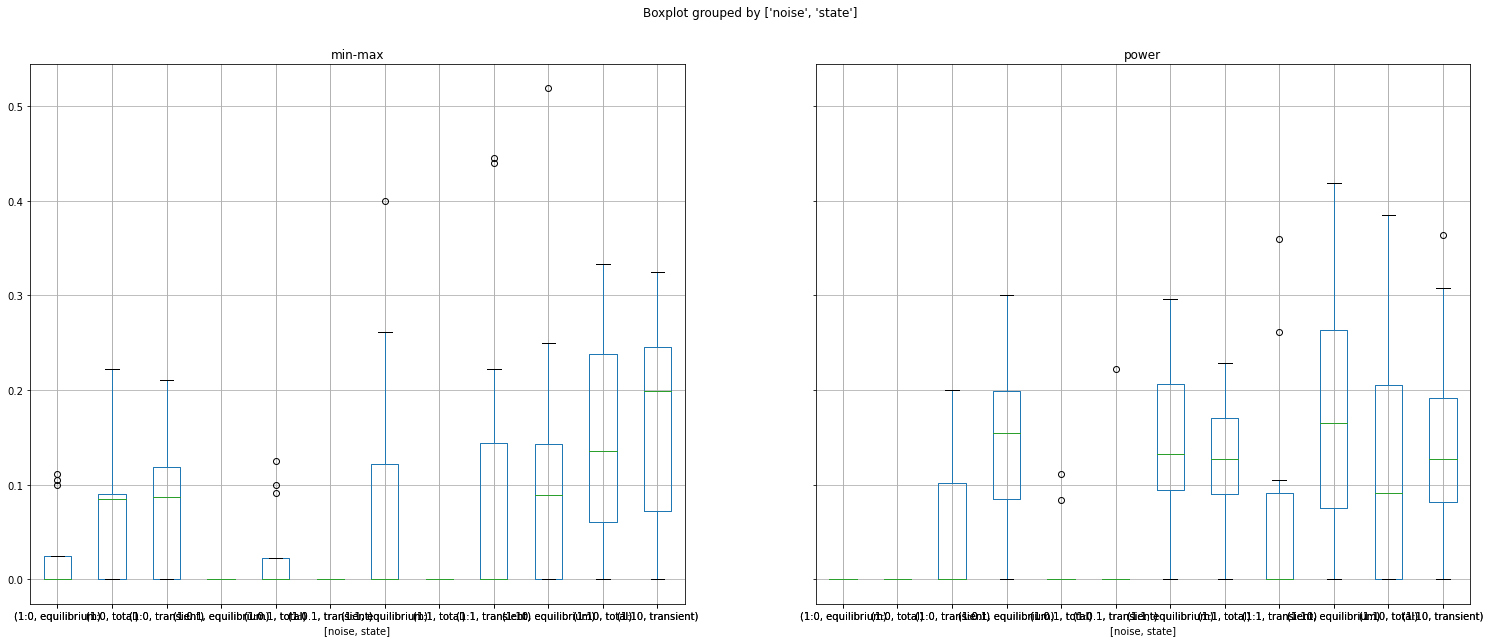

In [18]:
# Set figure size
plt.rcParams['figure.figsize'] = [25, 10]

boxplot_scores(newdf(get_scores(data, 'f1')), 'f1', ['noise', 'state']) # (resolution, noise, layers, state and years)

In [21]:
newdf(get_scores(data, 'f1'))

,min-max,power
0,0.000000,0.000000
1,0.000000,0.000000
2,0.086957,0.000000
3,0.086957,0.000000
4,0.222222,0.000000
...,...,...
139,0.250000,0.418605
140,0.111111,0.187500
141,0.080000,0.307692
142,0.000000,0.142857


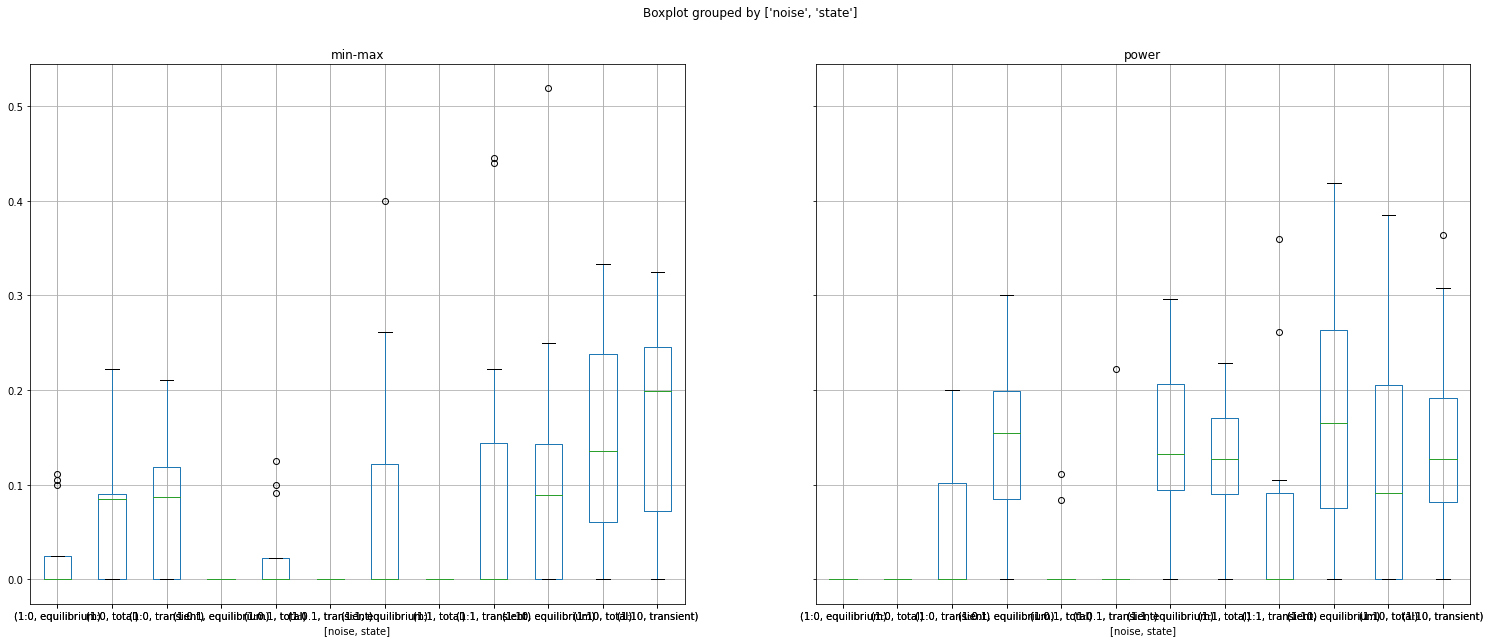

In [23]:
df = boxplot_scores(newdf(get_scores(data, 'f1')), 'f1', ['noise', 'state'])

AttributeError: 'numpy.ndarray' object has no attribute 'plt'

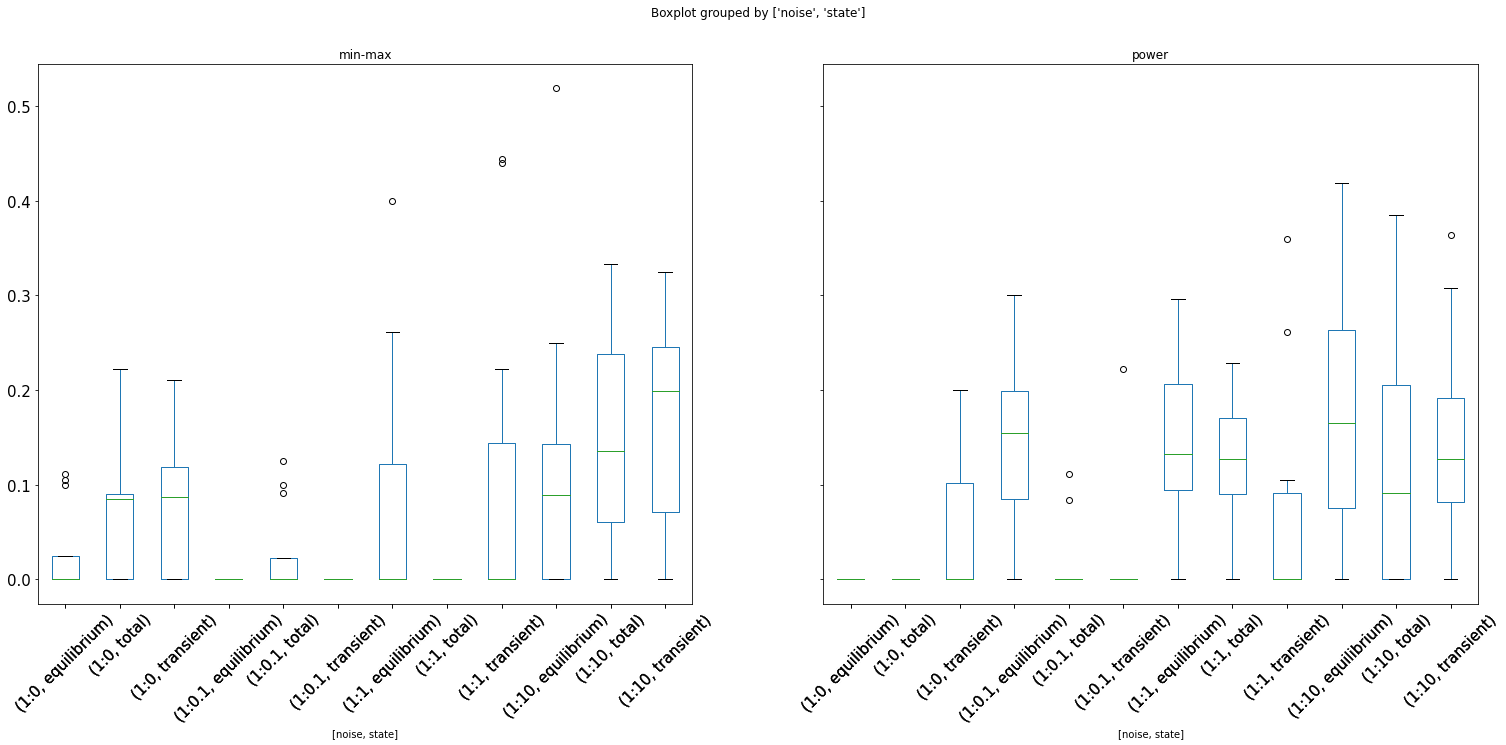

In [85]:
from matplotlib import pyplot as plt

plots = df.boxplot(by=['noise', 'state'], grid=False, rot=45, fontsize=15)


In [25]:
df

,min-max,power,resolution,noise,layers,state,years
f1,,,,,,,
0,0.000000,0.000000,36500,1:0,2,total,0 100
1,0.000000,0.000000,36500,1:0,2,total,0 100
2,0.086957,0.000000,36500,1:0,2,total,0 100
3,0.086957,0.000000,36500,1:0,2,total,20 70
4,0.222222,0.000000,36500,1:0,2,total,20 70
...,...,...,...,...,...,...,...
139,0.250000,0.418605,365,1:10,3,equilibrium,0 20
140,0.111111,0.187500,365,1:10,3,equilibrium,0 20
141,0.080000,0.307692,365,1:10,3,equilibrium,70 100


C:\Users\10528504\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


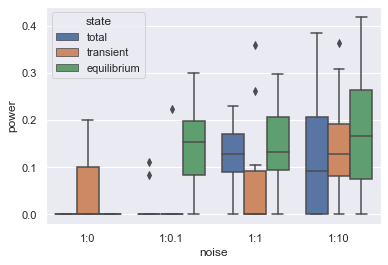

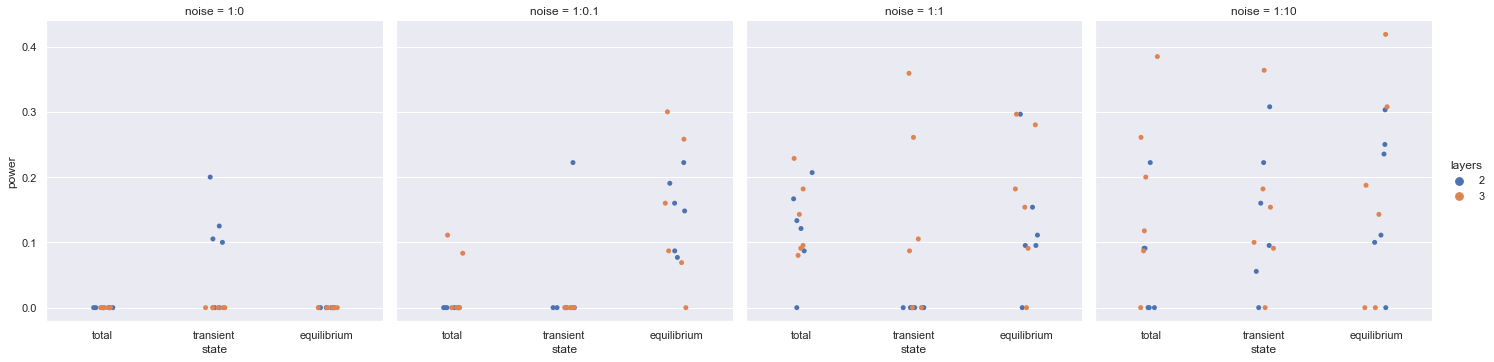

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
from IPython.display import display

%matplotlib inline

sns.set()
ax = sns.boxplot(x='noise', y='power', data=df, hue='state')
sns.catplot(x='state', col='noise', y='power', data=df, hue='layers', ax=ax)
plt.show()